english version: https://bit.ly/2yWgCE7

Dataset  disponibilizado por: [CSSEGISandData](https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series)

# Changelog

v1.0 

*   Versão inicial



[v1.0.1](https://github.com/Luscahm/covid_prediction/tree/V1.0.1)


*   Correção de bugs   

[v1.1](git.com.br) 
*   Melhora na previsão de casos e mortes no Brasil
*   Textos traduzidos para o ingles(link acima)
*   Imports desnecessarios foram excluidos
*   Correção de bugs



In [0]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error


plt.style.use('seaborn-darkgrid')

# Leitura de Dados

---



Nessa parte serão realizados os seguintes passos:


*   Transformar os csv disponivel no Git em um dataframe do pandas
*   Separar em  4 dataframes diferentes: 
      1.   Brasil
      2.   Estados Unidos
      3.   Suécia
      4.   Itália


*   Remover partes do dataframe que não serão usadas
*   iremos utilizar 3 dataframe para cada país: Confirmados, Mortes e Recuperados








In [0]:
url_confirmados = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
url_mortes = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"
url_recuperados = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv"
df_confirmados = pd.read_csv(url_confirmados)
df_mortes = pd.read_csv(url_mortes)
df_recuperados = pd.read_csv(url_recuperados)

In [0]:
df_confirmados.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,281,299,349,367,423,444,484,521,555,607
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,304,333,361,377,383,400,409,416,433,446
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,1171,1251,1320,1423,1468,1572,1666,1761,1825,1914
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,439,466,501,525,545,564,583,601,601,638
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,8,10,14,16,17,19,19,19,19,19


In [0]:
# Separing in locals dataframes

df_confirmados_brasil = df_confirmados.loc[df_confirmados['Country/Region'] == 'Brazil'].copy()
df_confirmados_italia = df_confirmados.loc[df_confirmados['Country/Region'] == 'Italy'].copy()
df_confirmados_eua = df_confirmados.loc[df_confirmados['Country/Region'] == 'US'].copy()
df_confirmados_suecia = df_confirmados.loc[df_confirmados['Country/Region'] == 'Sweden'].copy()
#-----------------------------------------------------------------------------------------------
df_mortes_brasil = df_mortes.loc[df_mortes['Country/Region'] == 'Brazil'].copy()
df_mortes_italia = df_mortes.loc[df_mortes['Country/Region'] == 'Italy'].copy()
df_mortes_eua = df_mortes.loc[df_mortes['Country/Region'] == 'US'].copy()
df_mortes_suecia = df_mortes.loc[df_mortes['Country/Region'] == 'Sweden'].copy()
#-----------------------------------------------------------------------------------------------
df_recuperados_brasil = df_recuperados.loc[df_recuperados['Country/Region'] == 'Brazil'].copy()
df_recuperados_italia = df_recuperados.loc[df_recuperados['Country/Region'] == 'Italy'].copy()
df_recuperados_eua = df_recuperados.loc[df_recuperados['Country/Region'] == 'US'].copy()
df_recuperados_suecia = df_recuperados.loc[df_recuperados['Country/Region'] == 'Sweden'].copy()

In [0]:
df_confirmados_brasil.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20
28,NaN,Brazil,-14.235,-51.9253,0,0,0,0,0,0,...,9056,10360,11130,12161,14034,16170,18092,19638,20727,22192


In [0]:
df_confirmados_italia.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20
137,NaN,Italy,43.0,12.0,0,0,0,0,0,0,...,119827,124632,128948,132547,135586,139422,143626,147577,152271,156363


In [0]:
df_confirmados_eua.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20
225,NaN,US,37.0902,-95.7129,1,1,2,2,5,5,...,275586,308853,337072,366667,396223,429052,461437,496535,526396,555313


In [0]:
df_confirmados_suecia.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20
205,NaN,Sweden,63.0,16.0,0,0,0,0,0,0,...,6131,6443,6830,7206,7693,8419,9141,9685,10151,10483


In [0]:
# Fazendo com que todos os df comecem apenas 1 dia antes do 1º casi de covid 
df_confirmados_brasil = df_confirmados_brasil.iloc[:,39:]
df_confirmados_eua = df_confirmados_eua.iloc[:,4:]
df_confirmados_italia = df_confirmados_italia.iloc[:,12:]
df_confirmados_suecia = df_confirmados_suecia.iloc[:,13:]
# -------------------------------------------------------------
df_mortes_brasil = df_mortes_brasil.iloc[:,39:]
df_mortes_eua = df_mortes_eua.iloc[:,4:]
df_mortes_italia = df_mortes_italia.iloc[:,12:]
df_mortes_suecia = df_mortes_suecia.iloc[:,13:]
# -------------------------------------------------------------
df_recuperados_brasil = df_recuperados_brasil.iloc[:,39:]
df_recuperados_eua = df_recuperados_eua.iloc[:,4:]
df_recuperados_italia = df_recuperados_italia.iloc[:,12:]
df_recuperados_suecia = df_recuperados_suecia.iloc[:,13:]

# Tratando os dados



Tendo em vista que o algoritmo de aprendizado de maquina não aceita datas no formato MM/DD/AA, nos iremos realizar alguns tratamentos nesses dataframes para conseguir o que queremos, realizaremos os seguinte passos:


*   Extrairemos os index das colunas
*   Extrairemos os numeros de casos de cada país
*   transformaremos as datas em dias corridos, 1º dia do covid = 0, segundo = 1,etc..
*   Escolheremos em quantos dias corridos no futuro queremos fazer a predição
*   transformaremos os dias corridos em datas mm/dd/yy
*   Transpor todos os dataframes









In [0]:
# pegando o indice das colunas:
index_brasil = list(df_confirmados_brasil.columns.values) 
index_italia = list(df_confirmados_italia.columns.values) 
index_eua = list(df_confirmados_eua.columns.values) 
index_suecia = list(df_confirmados_suecia.columns.values) 

In [0]:
# pegando os valores de todos df do brasil para auxiliar em construções de graficos:
casos_brasil = []
mortes_brasil = []
recuperados_brasil = []
for i in index_brasil:
    confirmados_brasil = df_confirmados_brasil[i].sum()
    casos_brasil.append(confirmados_brasil)
    
    mortos_brasil = df_mortes_brasil[i].sum()
    mortes_brasil.append(mortos_brasil)
    
    recupera_brasil = df_recuperados_brasil[i].sum()
    recuperados_brasil.append(recupera_brasil)

In [0]:
# realizando o mesmo processo anterior para o eua
casos_eua = []
mortes_eua = []
recuperados_eua = []

for i in index_eua:
    confirmados_eua = df_confirmados_eua[i].sum()
    casos_eua.append(confirmados_eua)
    
    mortos_eua = df_mortes_eua[i].sum()
    mortes_eua.append(mortos_eua)

    recupera_eua = df_recuperados_eua[i].sum()
    recuperados_eua.append(recupera_eua)


In [0]:
# realizando o mesmo processo anterior para a italia
casos_italia = []
mortes_italia = []
recuperados_italia = []

for i in index_italia:

    confirmados_italia = df_confirmados_italia[i].sum()
    casos_italia.append(confirmados_italia)
    
    mortos_italia = df_mortes_italia[i].sum()
    mortes_italia.append(mortos_italia)
    
    recupera_italia = df_recuperados_italia[i].sum()
    recuperados_italia.append(recupera_italia)
   
    
    

In [0]:
# realizando o mesmo processo anterior para a suecia
casos_suecia  = []
mortes_suecia  = []
recuperados_suecia  = []
for i in index_suecia:
    confirmados_suecia = df_confirmados_suecia[i].sum()
    casos_suecia.append(confirmados_suecia)
    
    mortos_suecia = df_mortes_suecia[i].sum()
    mortes_suecia.append(mortos_suecia)

    recupera_suecia = df_recuperados_suecia[i].sum()
    recuperados_suecia.append(recupera_suecia)

In [0]:
# transformando as datas em um numpy array de dias corridos:
dias_brasil = np.array([i for i in range(len(index_brasil))]).reshape(-1, 1)
dias_eua = np.array([i for i in range(len(index_eua))]).reshape(-1, 1)
dias_italia = np.array([i for i in range(len(index_italia))]).reshape(-1, 1)
dias_suecia = np.array([i for i in range(len(index_suecia))]).reshape(-1, 1)

In [0]:
futuro = 40 # essa variavel define quantos dias para frente a partir de hoje queremos prever.
# fazendo  datas futuras em numpy array de dias corridos 
futuro_brasil = np.array([i for i in range(len(index_brasil) + futuro)]).reshape(-1, 1)
futuro_eua = np.array([i for i in range(len(index_eua) + futuro)]).reshape(-1, 1)
futuro_italia = np.array([i for i in range(len(index_italia) + futuro)]).reshape(-1, 1)
futuro_suecia = np.array([i for i in range(len(index_suecia) + futuro)]).reshape(-1, 1)

In [0]:
# transformando datas futuras corridas em datas de formato mm/dd/yy
start_br = '2/26/20'
start_br = datetime.datetime.strptime(start_br,"%m/%d/%y")
datas_futuras_br = []
for i in range(len(futuro_brasil)):
    datas_futuras_br.append((start_br + datetime.timedelta(days=i)).strftime('%m/%d/%y'))
#---------------------------------------------------------------------------------------------------
start_us = '1/22/20'
start_us = datetime.datetime.strptime(start_us,"%m/%d/%y")
datas_futuras_us = []
for i in range(len(futuro_eua)):
    datas_futuras_us.append((start_us + datetime.timedelta(days=i)).strftime('%m/%d/%y'))
#---------------------------------------------------------------------------------------------------
start_it = '1/30/20'
start_it = datetime.datetime.strptime(start_it,"%m/%d/%y")
datas_futuras_it = []
for i in range(len(futuro_italia)):
    datas_futuras_it.append((start_it + datetime.timedelta(days=i)).strftime('%m/%d/%y'))
#---------------------------------------------------------------------------------------------------
start_su = '1/31/20'
start_su = datetime.datetime.strptime(start_su,"%m/%d/%y")
datas_futuras_su = []
for i in range(len(futuro_suecia)):
    datas_futuras_su.append((start_su + datetime.timedelta(days=i)).strftime('%m/%d/%y'))

In [0]:
# transpondo todos os dataframes
df_confirmados_brasil = df_confirmados_brasil.T
df_confirmados_brasil['dates'] = index_brasil

df_mortes_brasil = df_mortes_brasil.T
df_mortes_brasil['dates'] = index_brasil

df_recuperados_brasil = df_recuperados_brasil.T
df_recuperados_brasil['dates'] = index_brasil

new_index_br = [x for x in range(len(index_brasil))]
#----------------------------------------------------
df_confirmados_eua = df_confirmados_eua.T
df_confirmados_eua['dates'] = index_eua

df_mortes_eua = df_mortes_eua.T
df_mortes_eua['dates'] = index_eua

df_recuperados_eua = df_recuperados_eua.T
df_recuperados_eua['dates'] = index_eua

new_index_eua = [x for x in range(len(index_eua))]
#----------------------------------------------------
df_confirmados_italia = df_confirmados_italia.T
df_confirmados_italia['dates'] = index_italia

df_mortes_italia = df_mortes_italia.T
df_mortes_italia['dates'] = index_italia

df_recuperados_italia = df_recuperados_italia.T
df_recuperados_italia['dates'] = index_italia

new_index_it = [x for x in range(len(index_italia))]
#----------------------------------------------------
df_confirmados_suecia = df_confirmados_suecia.T
df_confirmados_suecia['dates'] = index_suecia

df_mortes_suecia = df_mortes_suecia.T
df_mortes_suecia['dates'] = index_suecia

df_recuperados_suecia = df_recuperados_suecia.T
df_recuperados_suecia['dates'] = index_suecia
new_index_su = [x for x in range(len(index_suecia))]


In [0]:
df_confirmados_brasil.head()


,28,dates
2/26/20,1,2/26/20
2/27/20,1,2/27/20
2/28/20,1,2/28/20
2/29/20,2,2/29/20
3/1/20,2,3/1/20


In [0]:
# como vimos os index estão errados, iremos arrumar-los agora.
df_confirmados_brasil['index'] = new_index_br
df_confirmados_brasil = df_confirmados_brasil.set_index('index')
df_confirmados_brasil.rename(columns={28:'cases',
                   'dates':'dates'}, 
                 inplace=True)
df_confirmados_brasil.index.name = None
df_confirmados_brasil['dates'] = dias_brasil

df_mortes_brasil['index'] = new_index_br
df_mortes_brasil = df_mortes_brasil.set_index('index')
df_mortes_brasil.rename(columns={28:'deaths',
                   'dates':'dates'}, 
                 inplace=True)
df_mortes_brasil.index.name = None
df_mortes_brasil['dates'] = dias_brasil

df_recuperados_brasil['index'] = new_index_br
df_recuperados_brasil = df_recuperados_brasil.set_index('index')
df_recuperados_brasil.rename(columns={29:'recovery',
                   'dates':'dates'}, 
                 inplace=True)
df_recuperados_brasil.index.name = None
df_recuperados_brasil['dates'] = dias_brasil

#------------------------------------------------
df_confirmados_eua['index'] = new_index_eua
df_confirmados_eua = df_confirmados_eua.set_index('index')
df_confirmados_eua.rename(columns={225:'cases',
                   'dates':'dates'}, 
                 inplace=True)
df_confirmados_eua.index.name = None
df_confirmados_eua['dates'] = dias_eua

df_mortes_eua['index'] = new_index_eua
df_mortes_eua = df_mortes_eua.set_index('index')
df_mortes_eua.rename(columns={225:'deaths',
                   'dates':'dates'}, 
                 inplace=True)
df_mortes_eua.index.name = None
df_mortes_eua['dates'] = dias_eua

df_recuperados_eua['index'] = new_index_eua
df_recuperados_eua = df_recuperados_eua.set_index('index')
df_recuperados_eua.rename(columns={225:'recovery',
                   'dates':'dates'}, 
                 inplace=True)
df_recuperados_eua.index.name = None
df_recuperados_eua['dates'] = dias_eua
#------------------------------------------------
df_confirmados_italia['index'] = new_index_it
df_confirmados_italia = df_confirmados_italia.set_index('index')
df_confirmados_italia.rename(columns={137:'cases',
                   'dates':'dates'}, 
                 inplace=True)
df_confirmados_italia.index.name = None
df_confirmados_italia['dates'] = dias_italia

df_mortes_italia['index'] = new_index_it
df_mortes_italia = df_mortes_italia.set_index('index')
df_mortes_italia.rename(columns={137:'deaths',
                   'dates':'dates'}, 
                 inplace=True)
df_mortes_italia.index.name = None
df_mortes_italia['dates'] = dias_italia

df_recuperados_italia['index'] = new_index_it
df_recuperados_italia = df_recuperados_italia.set_index('index')
df_recuperados_italia.rename(columns={131:'recovery',
                   'dates':'dates'}, 
                 inplace=True)
df_recuperados_italia.index.name = None
df_recuperados_italia['dates'] = dias_italia
#------------------------------------------------
df_confirmados_suecia['index'] = new_index_su
df_confirmados_suecia = df_confirmados_suecia.set_index('index')
df_confirmados_suecia.rename(columns={205:'cases',
                   'dates':'dates'}, 
                 inplace=True)
df_confirmados_suecia.index.name = None
df_confirmados_suecia['dates'] = dias_suecia

df_mortes_suecia['index'] = new_index_su
df_mortes_suecia = df_mortes_suecia.set_index('index')
df_mortes_suecia.rename(columns={205:'deaths',
                   'dates':'dates'}, 
                 inplace=True)
df_mortes_suecia.index.name = None
df_mortes_suecia['dates'] = dias_suecia

df_recuperados_suecia['index'] = new_index_su
df_recuperados_suecia = df_recuperados_suecia.set_index('index')
df_recuperados_suecia.rename(columns={203:'recovery',
                   'dates':'dates'}, 
                 inplace=True)
df_recuperados_suecia.index.name = None
df_recuperados_suecia['dates'] = dias_suecia

abaixo, visualizaremos os dataframes transposto

In [0]:
df_confirmados_brasil.head()

,cases,dates
0,1,0
1,1,1
2,1,2
3,2,3
4,2,4


In [0]:
df_mortes_eua.head()

,deaths,dates
0,0,0
1,0,1
2,0,2
3,0,3
4,0,4


In [0]:
df_recuperados_suecia.head()

,recovery,dates
0,0,0
1,0,1
2,0,2
3,0,3
4,0,4


In [0]:
df_mortes_italia.head()

,deaths,dates
0,0,0
1,0,1
2,0,2
3,0,3
4,0,4


a parte de separar target de dados, e de separar em train e test será feita na secao de predicao

# Apresentação de Graficos

Nessa seção apenas sera apresentados alguns graficos que nos ajudara a entender como anda a situacao do covid-19 nos 4 paises selecionados

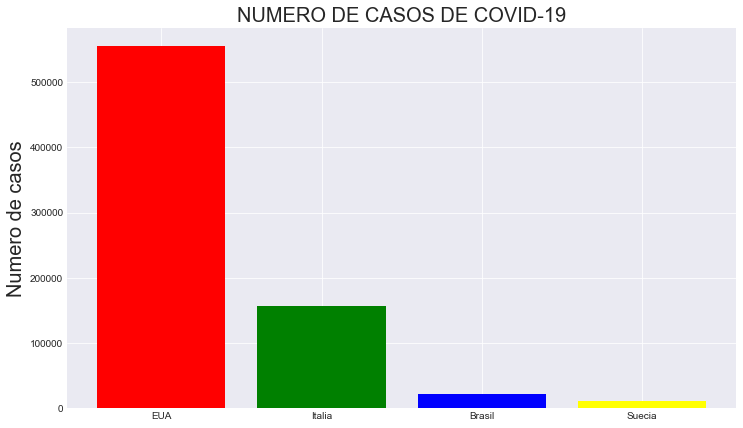

In [0]:
fig = plt.figure(figsize=(12, 7))
paises = ['EUA', 'Italia', 'Brasil', 'Suecia']
numeros = [confirmados_eua,confirmados_italia,confirmados_brasil,confirmados_suecia]
plt.bar(paises,numeros, align='center', color=['red', 'green', 'blue', 'yellow'])

plt.ylabel('Numero de casos', size = 20)
plt.title('NUMERO DE CASOS DE COVID-19', size=20)
plt.show()

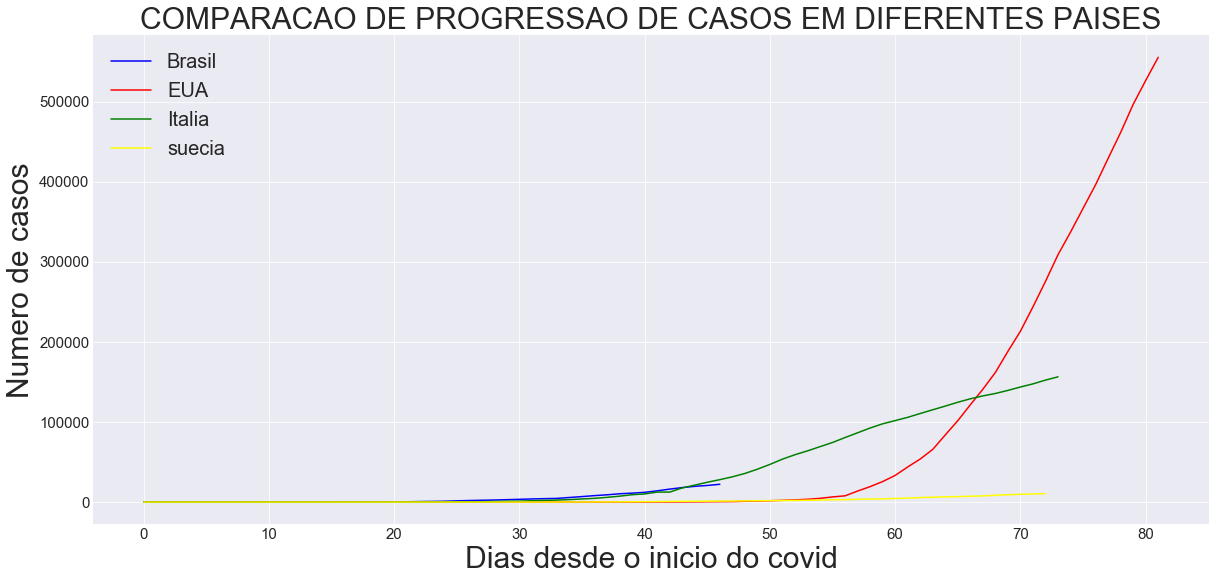

In [0]:
plt.figure(figsize=(20, 9))
plt.plot(dias_brasil, casos_brasil, color='blue')
plt.plot(dias_eua, casos_eua, color='red')
plt.plot(dias_italia, casos_italia, color='green')
plt.plot(dias_suecia, casos_suecia, color='yellow')

plt.title('COMPARACAO DE PROGRESSAO DE CASOS EM DIFERENTES PAISES', size=30)
plt.xlabel('Dias desde o inicio do covid', size = 30)
plt.ylabel('Numero de casos', size = 30)
plt.legend(['Brasil', 'EUA','Italia', 'suecia'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


A suecia parece quase que uma linha reta ao se comparar com EUA e italia, o Brasil tambem esta bem discreto  ao lado de italia e EUA, a frente iremos comparar esses paises 2 a 2

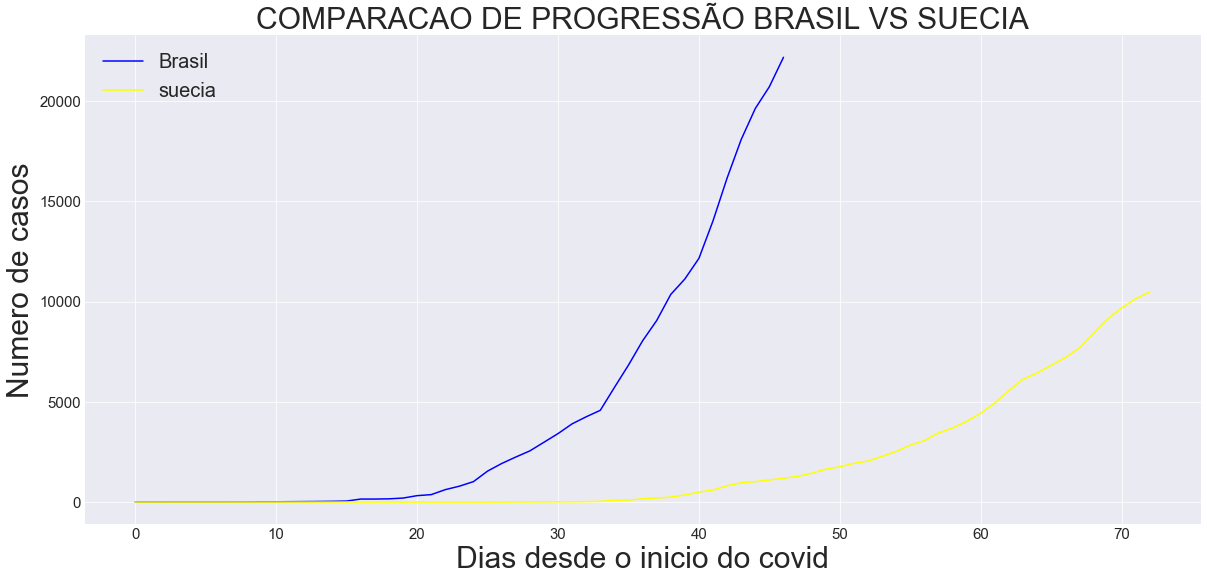

In [0]:
plt.figure(figsize=(20, 9))
plt.plot(dias_brasil, casos_brasil, color='blue')
plt.plot(dias_suecia, casos_suecia, color='yellow')


plt.title('COMPARACAO DE PROGRESSÃO BRASIL VS SUECIA', size=30)
plt.xlabel('Dias desde o inicio do covid', size = 30)
plt.ylabel('Numero de casos', size = 30)
plt.legend(['Brasil', 'suecia'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


como reparamos o covid demorou mais para começar a crescer na suecia do que no brasil

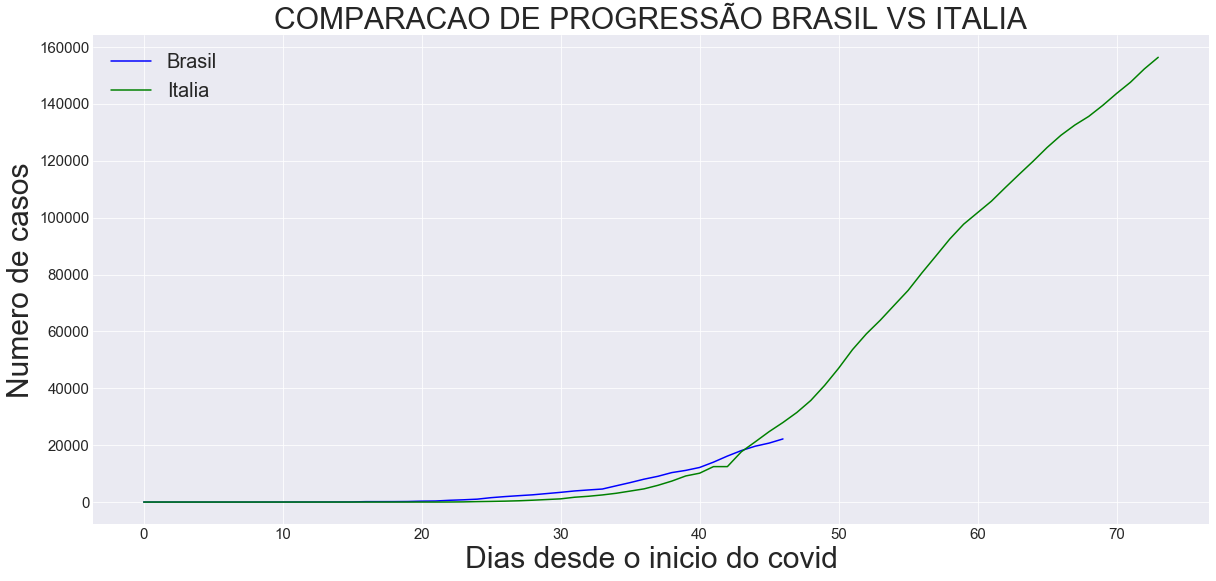

In [0]:
plt.figure(figsize=(20, 9))
plt.plot(dias_brasil, casos_brasil, color='blue')
plt.plot(dias_italia, casos_italia, color='green')


plt.title('COMPARACAO DE PROGRESSÃO BRASIL VS ITALIA', size=30)
plt.xlabel('Dias desde o inicio do covid', size = 30)
plt.ylabel('Numero de casos', size = 30)
plt.legend(['Brasil', 'Italia'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


Nao podemos esquecer que o brasil tem populacao maior que a da italia, para numeros reais precisariamos do percentual, que sera realizado mais para frente.

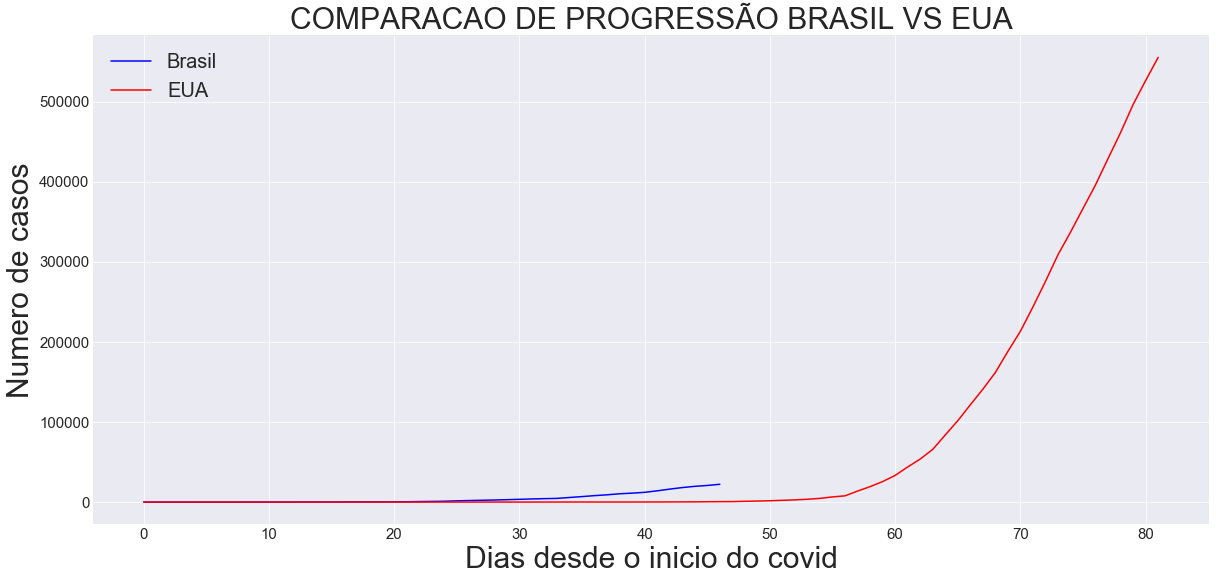

In [0]:
plt.figure(figsize=(20, 9))
plt.plot(dias_brasil, casos_brasil, color='blue')
plt.plot(dias_eua, casos_eua, color='red')

plt.title('COMPARACAO DE PROGRESSÃO BRASIL VS EUA', size=30)
plt.xlabel('Dias desde o inicio do covid', size = 30)
plt.ylabel('Numero de casos', size = 30)
plt.legend(['Brasil', 'EUA'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


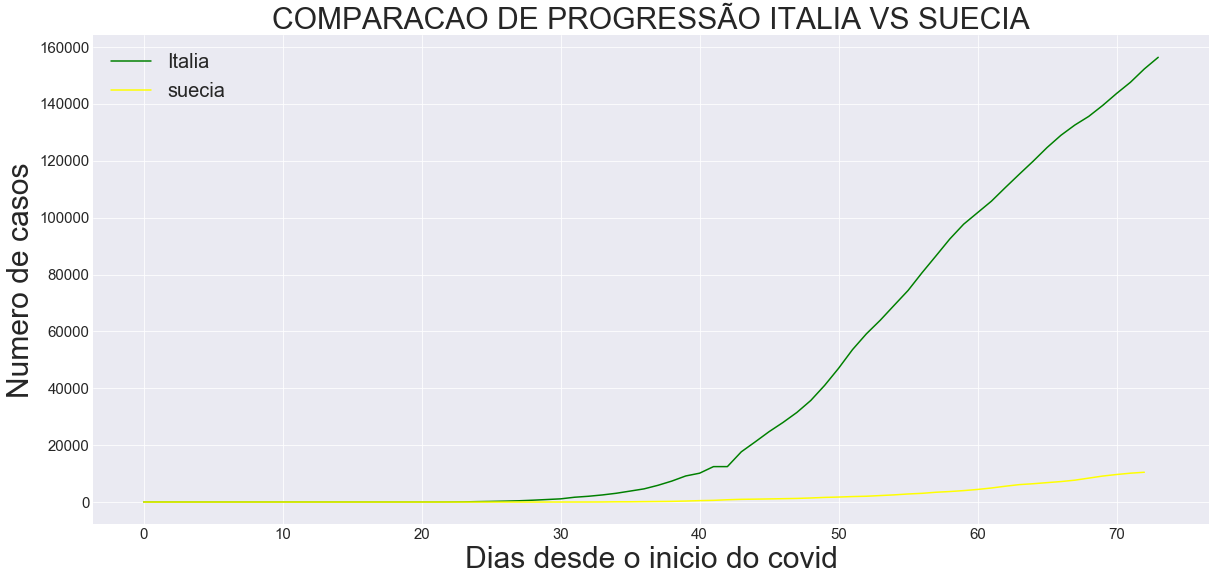

In [0]:
plt.figure(figsize=(20, 9))
plt.plot(dias_italia, casos_italia, color='green')
plt.plot(dias_suecia, casos_suecia, color='yellow')


plt.title('COMPARACAO DE PROGRESSÃO ITALIA VS SUECIA', size=30)
plt.xlabel('Dias desde o inicio do covid', size = 30)
plt.ylabel('Numero de casos', size = 30)
plt.legend(['Italia', 'suecia'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


mesmo caso da italia, precisamos de um percentual para saber como realmente esta

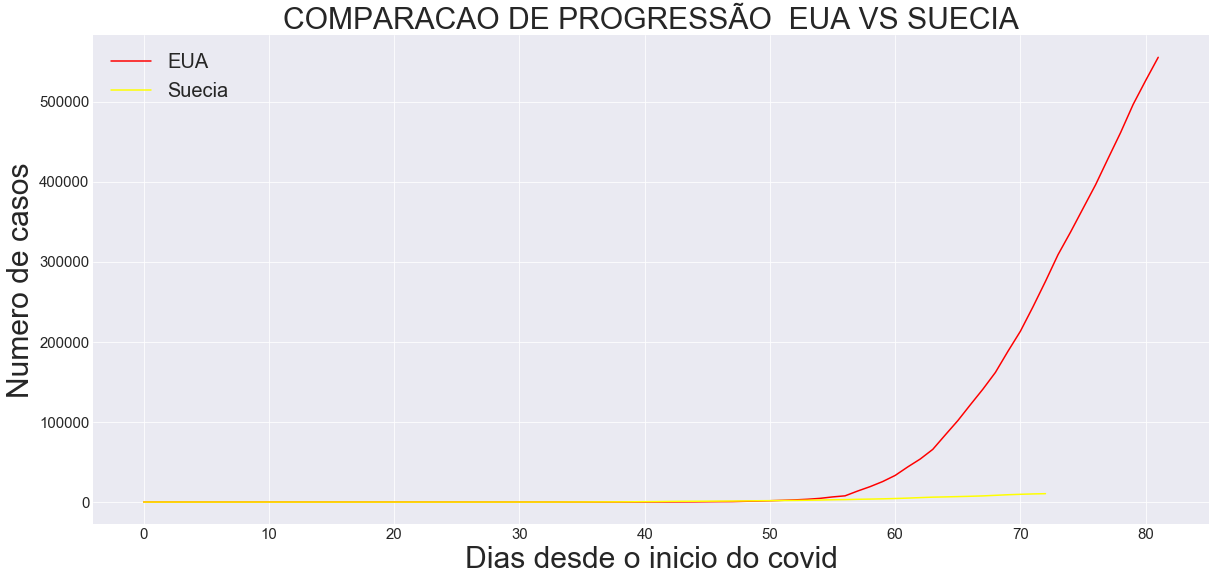

In [0]:
plt.figure(figsize=(20, 9))
plt.plot(dias_eua, casos_eua, color='red')
plt.plot(dias_suecia, casos_suecia, color='yellow')


plt.title('COMPARACAO DE PROGRESSÃO  EUA VS SUECIA', size=30)
plt.xlabel('Dias desde o inicio do covid', size = 30)
plt.ylabel('Numero de casos', size = 30)
plt.legend(['EUA', 'Suecia'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


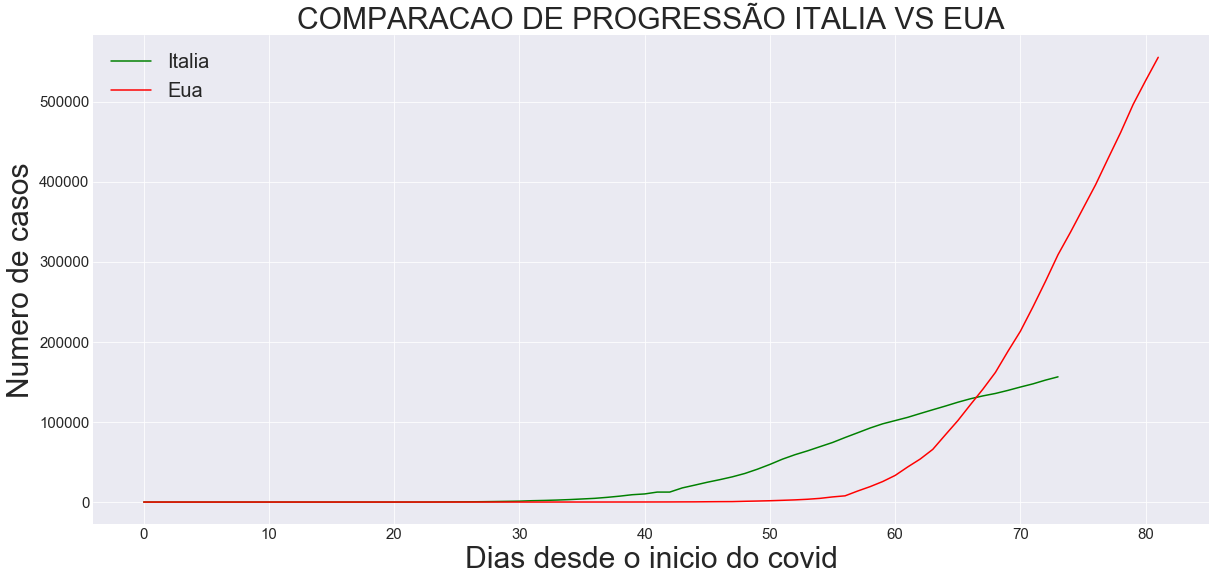

In [0]:
plt.figure(figsize=(20, 9))
plt.plot(dias_italia, casos_italia, color='green')
plt.plot(dias_eua, casos_eua, color='red')


plt.title('COMPARACAO DE PROGRESSÃO ITALIA VS EUA', size=30)
plt.xlabel('Dias desde o inicio do covid', size = 30)
plt.ylabel('Numero de casos', size = 30)
plt.legend(['Italia', 'Eua'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


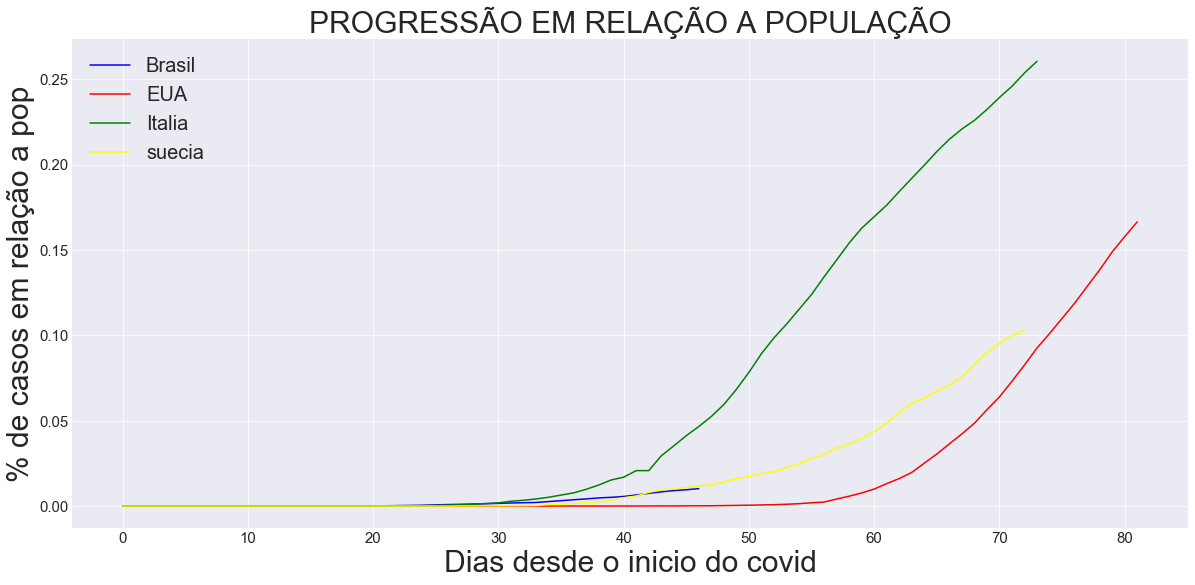

In [0]:
eua_porc = []
br_porc = []
it_porc = []
su_porc = []

for i in casos_eua:
  porc = (i / 333545145)*100
  eua_porc.append(porc)
for i in casos_brasil:
  porc = (i / 217089238)*100
  br_porc.append(porc)
for i in casos_italia:
  porc = (i / 60017348)*100
  it_porc.append(porc)
for i in casos_suecia:
  porc = (i / 10174790)*100
  su_porc.append(porc)

plt.figure(figsize=(20, 9))
plt.plot(dias_brasil, br_porc, color='blue')
plt.plot(dias_eua, eua_porc, color='red')
plt.plot(dias_italia, it_porc, color='green')
plt.plot(dias_suecia, su_porc, color='yellow')

plt.title('PROGRESSÃO EM RELAÇÃO A POPULAÇÃO', size=30)
plt.xlabel('Dias desde o inicio do covid', size = 30)
plt.ylabel('% de casos em relação a pop', size = 30)
plt.legend(['Brasil', 'EUA','Italia', 'suecia'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


 **O QUE PODE-SE REPARAR ATRAVEZ DESSES GRAFICOS DE CASOS:**
*   A italia esta partindo para a estabilização


*   A suecia assim como o Brasil esta em sua subida, apesar de a suecia ter demorado mais, se assemelha mto com o brasil
*   **Quando usamos porcentagem de população o Brasil eh oq menos tem casos**, e esta crescendo em um ritmo igual ao da suecia, logo espera-se que ate o 70º dia o Brasil tenha + ou -  172 mil casos
*   O Brasil assim como a suecia, tendem a ter mais casos percentuais doq os Estados Unidos
*   A Italia cresceu de forma muito grande percentualmente






repetiremos os mesmos graficos para mortes, e depois faremos graficos de mortes vs recuperados

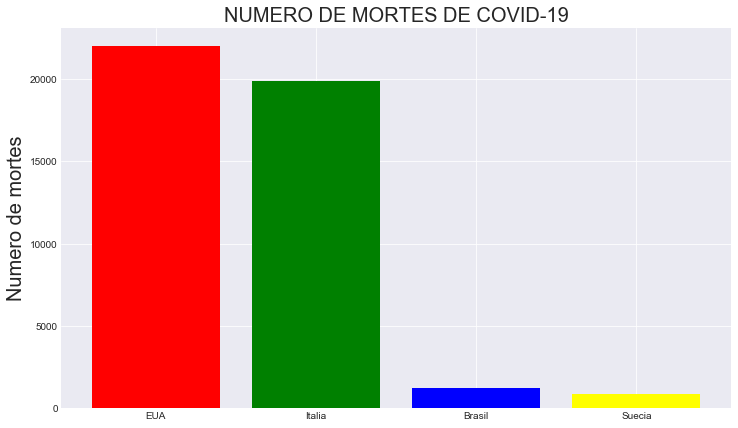

In [0]:
fig = plt.figure(figsize=(12, 7))
paises = ['EUA', 'Italia', 'Brasil', 'Suecia']
numeros = [mortos_eua,mortos_italia,mortos_brasil, mortos_suecia]
plt.bar(paises,numeros, align='center', color=['red', 'green', 'blue', 'yellow'])

plt.ylabel('Numero de mortes', size = 20)
plt.title('NUMERO DE MORTES DE COVID-19', size=20)
plt.show()

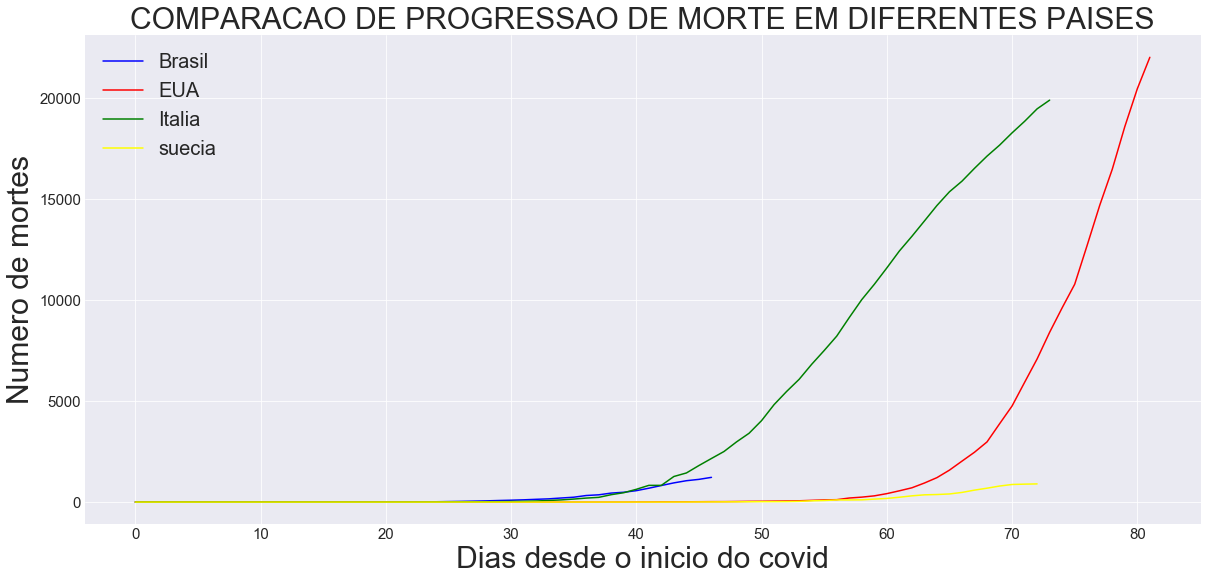

In [0]:
plt.figure(figsize=(20, 9))
plt.plot(dias_brasil, mortes_brasil, color='blue')
plt.plot(dias_eua, mortes_eua, color='red')
plt.plot(dias_italia, mortes_italia, color='green')
plt.plot(dias_suecia, mortes_suecia, color='yellow')

plt.title('COMPARACAO DE PROGRESSAO DE MORTE EM DIFERENTES PAISES', size=30)
plt.xlabel('Dias desde o inicio do covid', size = 30)
plt.ylabel('Numero de mortes', size = 30)
plt.legend(['Brasil', 'EUA','Italia', 'suecia'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


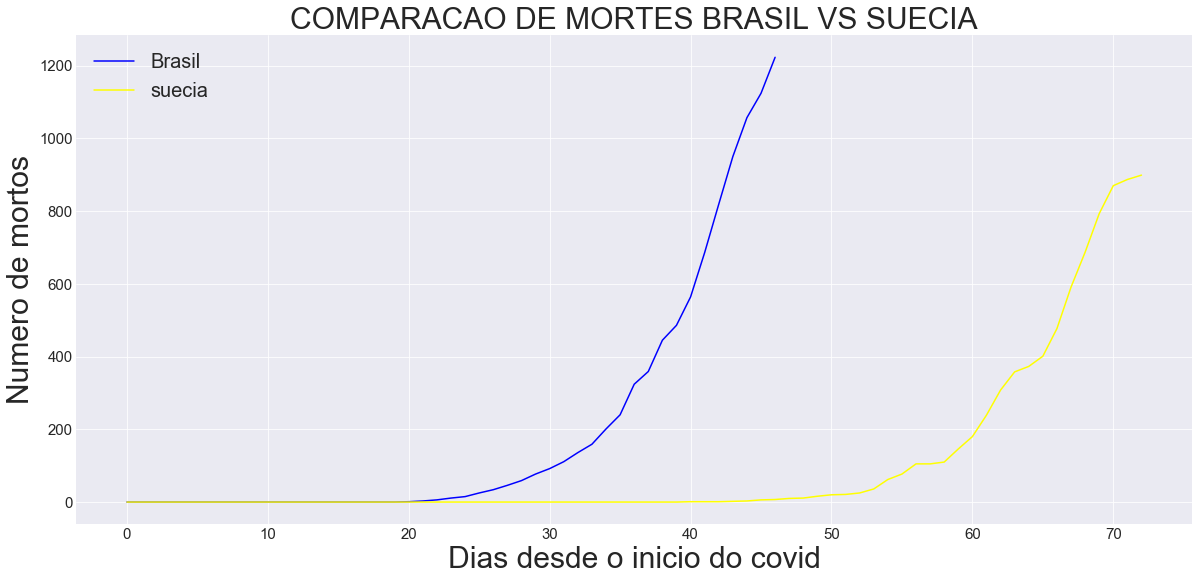

In [0]:
plt.figure(figsize=(20, 9))
plt.plot(dias_brasil, mortes_brasil, color='blue')
plt.plot(dias_suecia, mortes_suecia, color='yellow')


plt.title('COMPARACAO DE MORTES BRASIL VS SUECIA', size=30)
plt.xlabel('Dias desde o inicio do covid', size = 30)
plt.ylabel('Numero de mortos', size = 30)
plt.legend(['Brasil', 'suecia'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


a curva de mortes dos dois paises se parecem muito, com  a diferenca que a do Brasil comecou a subir antes

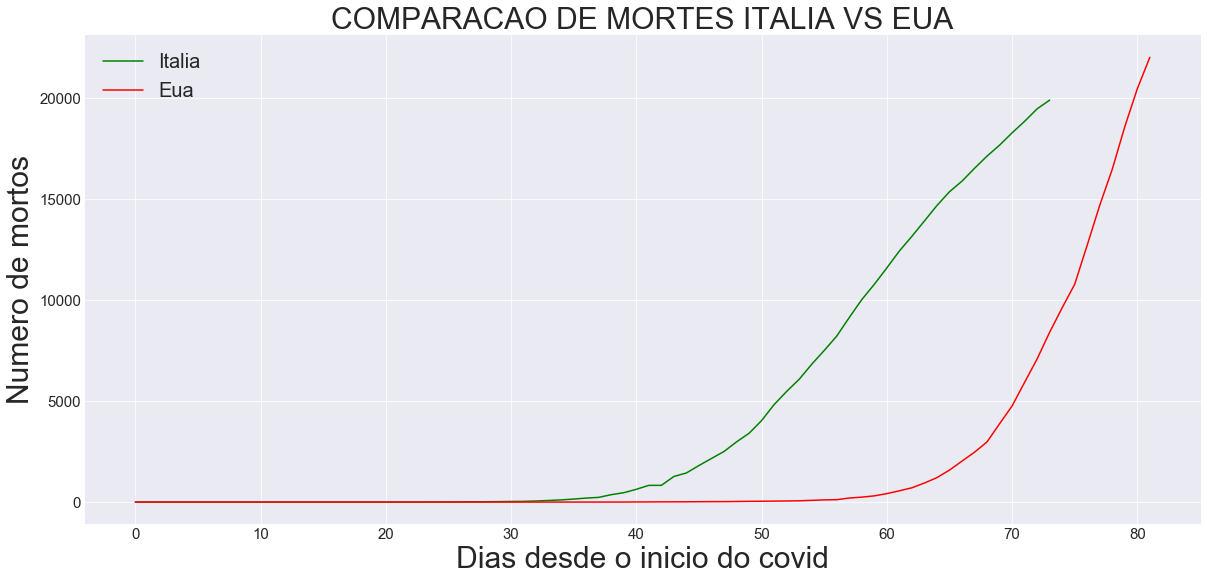

In [0]:
plt.figure(figsize=(20, 9))
plt.plot(dias_italia, mortes_italia, color='green')
plt.plot(dias_eua, mortes_eua, color='red')

plt.title('COMPARACAO DE MORTES ITALIA VS EUA', size=30)
plt.xlabel('Dias desde o inicio do covid', size = 30)
plt.ylabel('Numero de mortos', size = 30)
plt.legend(['Italia', 'Eua'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


vemos que a italia esta diminuindo os casos de morte, sua curva esta sendo "achatada", enquanto os eua estao so aumentando

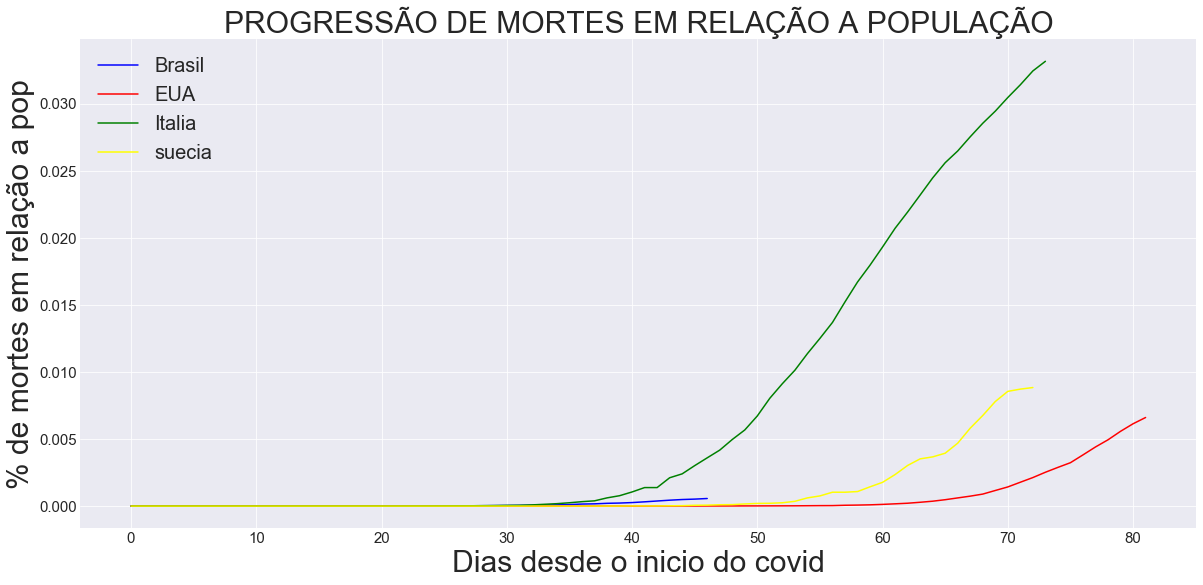

In [0]:
eua_porc = []
br_porc = []
it_porc = []
su_porc = []

for i in mortes_eua:
  porc = (i / 333545145)*100
  eua_porc.append(porc)
for i in mortes_brasil:
  porc = (i / 217089238)*100
  br_porc.append(porc)
for i in mortes_italia:
  porc = (i / 60017348)*100
  it_porc.append(porc)
for i in mortes_suecia:
  porc = (i / 10174790)*100
  su_porc.append(porc)

plt.figure(figsize=(20, 9))
plt.plot(dias_brasil, br_porc, color='blue')
plt.plot(dias_eua, eua_porc, color='red')
plt.plot(dias_italia, it_porc, color='green')
plt.plot(dias_suecia, su_porc, color='yellow')

plt.title('PROGRESSÃO DE MORTES EM RELAÇÃO A POPULAÇÃO', size=30)
plt.xlabel('Dias desde o inicio do covid', size = 30)
plt.ylabel('% de mortes em relação a pop', size = 30)
plt.legend(['Brasil', 'EUA','Italia', 'suecia'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


Quando vemos as mortes em relacao a % de populacao reparamos algumas coisas


*   A italia ainda eh disparada na frente com mais numeros de mortes
*   A suecia vem na frente do Brasil e EUA
*   O Brasil esta crescendo de forma mais rapida que os EUA e a Suecia
*   Suecia e EUA estao em sua curva de crescimento





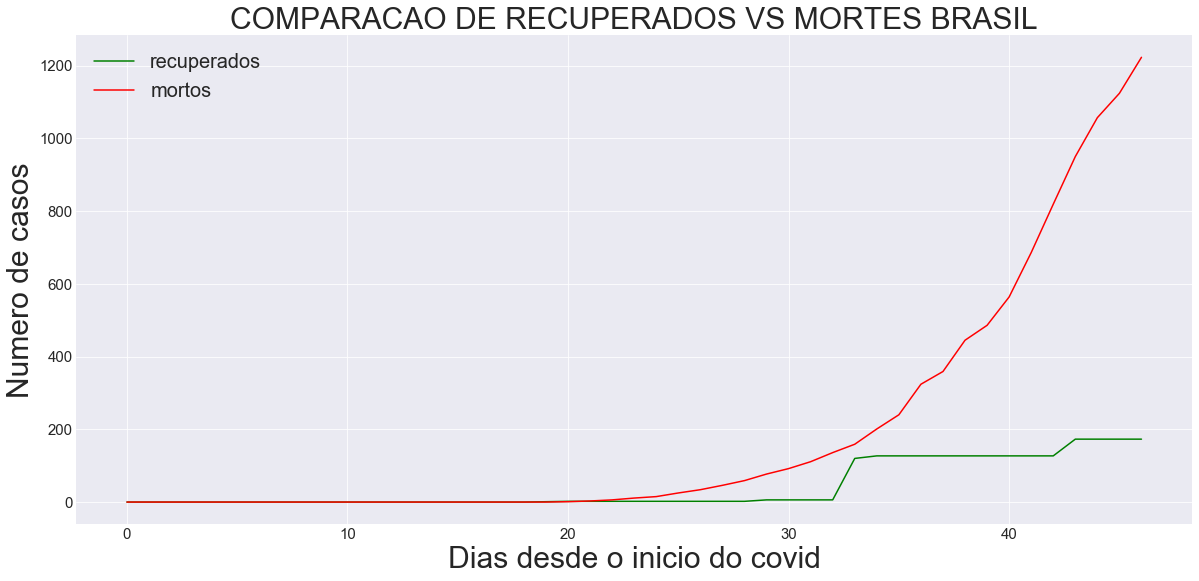

In [0]:
plt.figure(figsize=(20, 9))
plt.plot(dias_brasil, recuperados_brasil, color='green')
plt.plot(dias_brasil, mortes_brasil, color='red')


plt.title('COMPARACAO DE RECUPERADOS VS MORTES BRASIL', size=30)
plt.xlabel('Dias desde o inicio do covid', size = 30)
plt.ylabel('Numero de casos', size = 30)
plt.legend(['recuperados', 'mortos'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


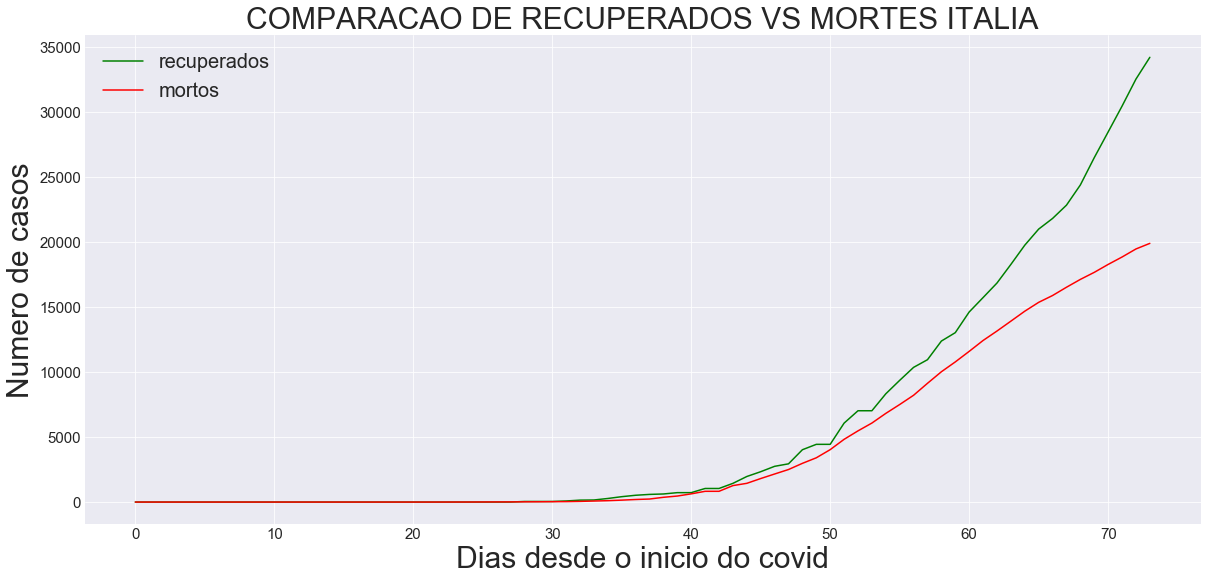

In [0]:
plt.figure(figsize=(20, 9))
plt.plot(dias_italia, recuperados_italia, color='green')
plt.plot(dias_italia, mortes_italia, color='red')


plt.title('COMPARACAO DE RECUPERADOS VS MORTES ITALIA', size=30)
plt.xlabel('Dias desde o inicio do covid', size = 30)
plt.ylabel('Numero de casos', size = 30)
plt.legend(['recuperados', 'mortos'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


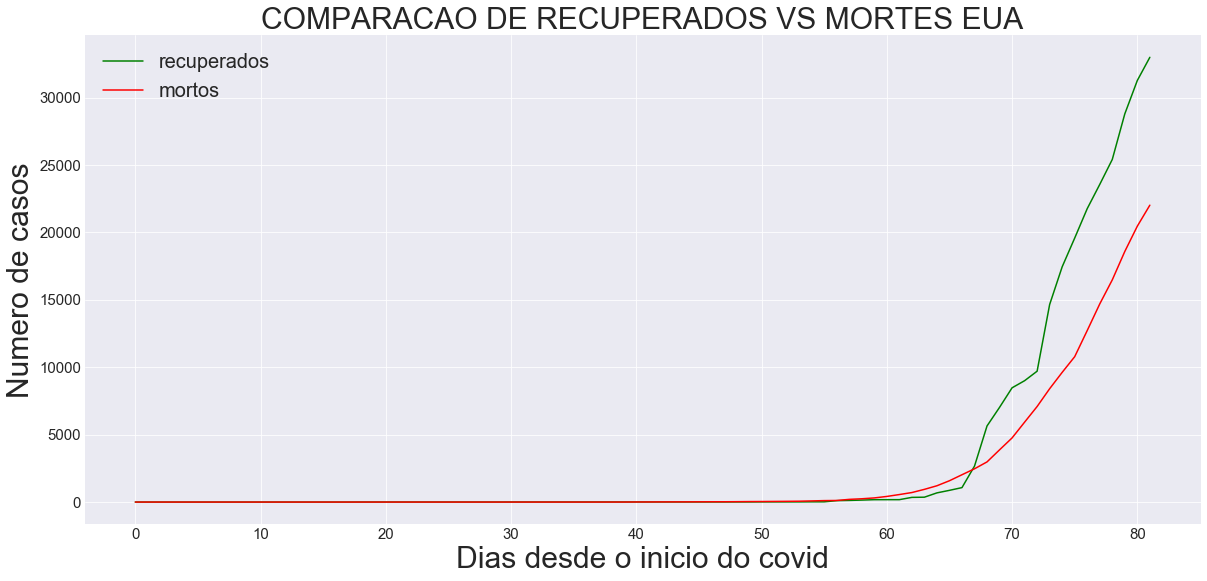

In [0]:
plt.figure(figsize=(20, 9))
plt.plot(dias_eua, recuperados_eua, color='green')
plt.plot(dias_eua, mortes_eua, color='red')


plt.title('COMPARACAO DE RECUPERADOS VS MORTES EUA', size=30)
plt.xlabel('Dias desde o inicio do covid', size = 30)
plt.ylabel('Numero de casos', size = 30)
plt.legend(['recuperados', 'mortos'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


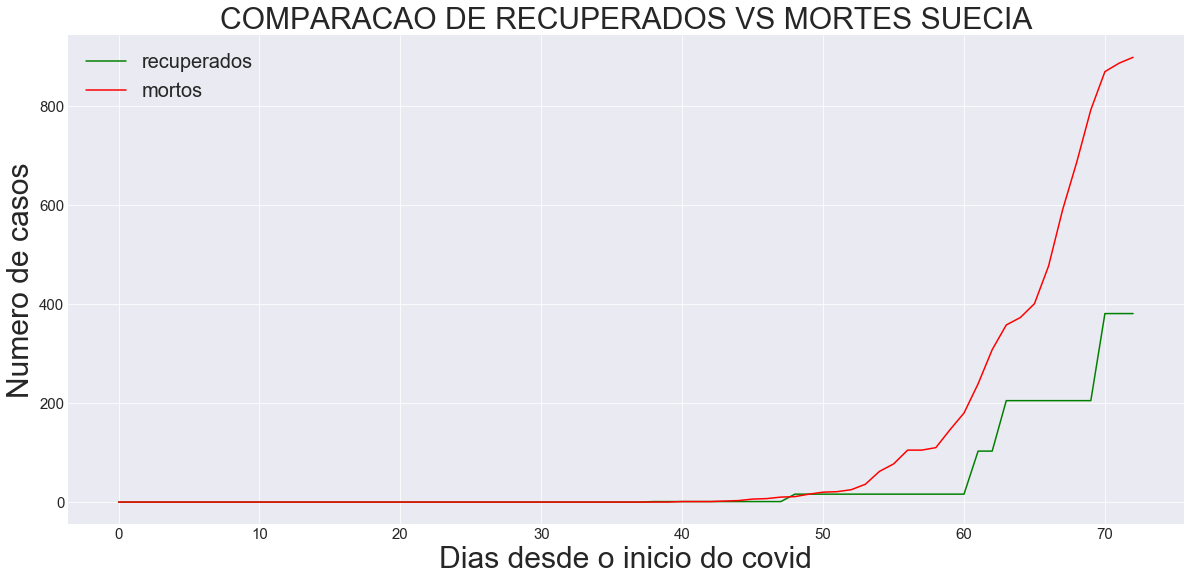

In [0]:
plt.figure(figsize=(20, 9))
plt.plot(dias_suecia, recuperados_suecia, color='green')
plt.plot(dias_suecia, mortes_suecia, color='red')


plt.title('COMPARACAO DE RECUPERADOS VS MORTES SUECIA', size=30)
plt.xlabel('Dias desde o inicio do covid', size = 30)
plt.ylabel('Numero de casos', size = 30)
plt.legend(['recuperados', 'mortos'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


Como podemos ver, nos paises que ja tiveram sua curva de crescimento mais acentuada, o numero de curados ultrapassa o numero de mortos, enquanto em paises como Brasil e Suecia que ainda nao chegou nessa curva de crescimento, o numero de mortes e maior que o de recuperados, inclusive o numero de recuperados chega a se estabilizar.
A suecia parece ser muito igual ao brasil em todos os casos, mortes, casos confirmados, e recuperados

# Previsões

Nesta secao nos aplicaremos o algoritmo SVR do sklearn para tentar prever o numero de mortes, casos e recuperados dos 4 paises nos proximos 40 dias.


---

OBS: 
TODAS AS 2  PREVISÕES PARA OS OUTROS PAISES TAMBEM ESTAO SENDO OTIMIZADAS EM OUTRO ARQUIVO PARA DIMINUIR O ERRO, ISSO PODERA DEMORAR ALGUNS DIAS, CASO QUEIRA O MAIS OTIMIZADO PARA OUTROS PAISES RETORNE OUTRO DIA

In [0]:
#separando o target(valor a ser previsto) das datas
target_confirmado_br = df_confirmados_brasil['cases'].copy()
df_confirmados_brasil.drop('cases', axis = 1, inplace= True)

target_mortos_br = df_mortes_brasil['deaths'].copy()
df_mortes_brasil.drop('deaths', axis = 1, inplace= True)

target_recuperado_br = df_recuperados_brasil['recovery']
df_recuperados_brasil.drop('recovery', axis = 1, inplace= True)
#-------------------------------------------------------------------------
target_confirmado_eua = df_confirmados_eua['cases'].copy()
df_confirmados_eua.drop('cases', axis = 1, inplace= True)

target_mortos_eua = df_mortes_eua['deaths'].copy()
df_mortes_eua.drop('deaths', axis = 1, inplace= True)

target_recuperado_eua = df_recuperados_eua['recovery']
df_recuperados_eua.drop('recovery', axis = 1, inplace= True)
#-------------------------------------------------------------------------
target_confirmado_italia = df_confirmados_italia['cases'].copy()
df_confirmados_italia.drop('cases', axis = 1, inplace= True)

target_mortos_italia = df_mortes_italia['deaths'].copy()
df_mortes_italia.drop('deaths', axis = 1, inplace= True)

target_recuperado_italia = df_recuperados_italia['recovery']
df_recuperados_italia.drop('recovery', axis = 1, inplace= True)
#-------------------------------------------------------------------------
target_confirmado_suecia = df_confirmados_suecia['cases'].copy()
df_confirmados_suecia.drop('cases', axis = 1, inplace= True)

target_mortos_suecia = df_mortes_suecia['deaths'].copy()
df_mortes_suecia.drop('deaths', axis = 1, inplace= True)

target_recuperado_suecia = df_recuperados_suecia['recovery']
df_recuperados_suecia.drop('recovery', axis = 1, inplace= True)

In [0]:
#COMECAREMOS PELO BRASIL:

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_confirmados_brasil, target_confirmado_br, test_size=0.1, random_state=42)

In [0]:
params = {'C': [2], 'coef0': [0.0, 3.5], 'epsilon': [0.001], 'gamma': [0.5], 'kernel': ['poly'], 'max_iter': [-1], 'shrinking':[False]}
# o gridsearch esta implementando bruto em outro arquivo na maquina local, pois ele demorou mais de 24h para rodar
svr = SVR()
svm = GridSearchCV(svr, params,scoring='neg_mean_absolute_error', cv=10,return_train_score=False, n_jobs=-1, verbose=1 )
print('fitting...')
svm.fit(X_train,y_train)

fitting...
Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  3.4min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [2], 'coef0': [0.0, 3.5], 'epsilon': [0.001],
                         'gamma': [0.5], 'kernel': ['poly'], 'max_iter': [-1],
                         'shrinking': [False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_absolute_error', verbose=1)

In [0]:
pred_caso_br = svm.predict(futuro_brasil)

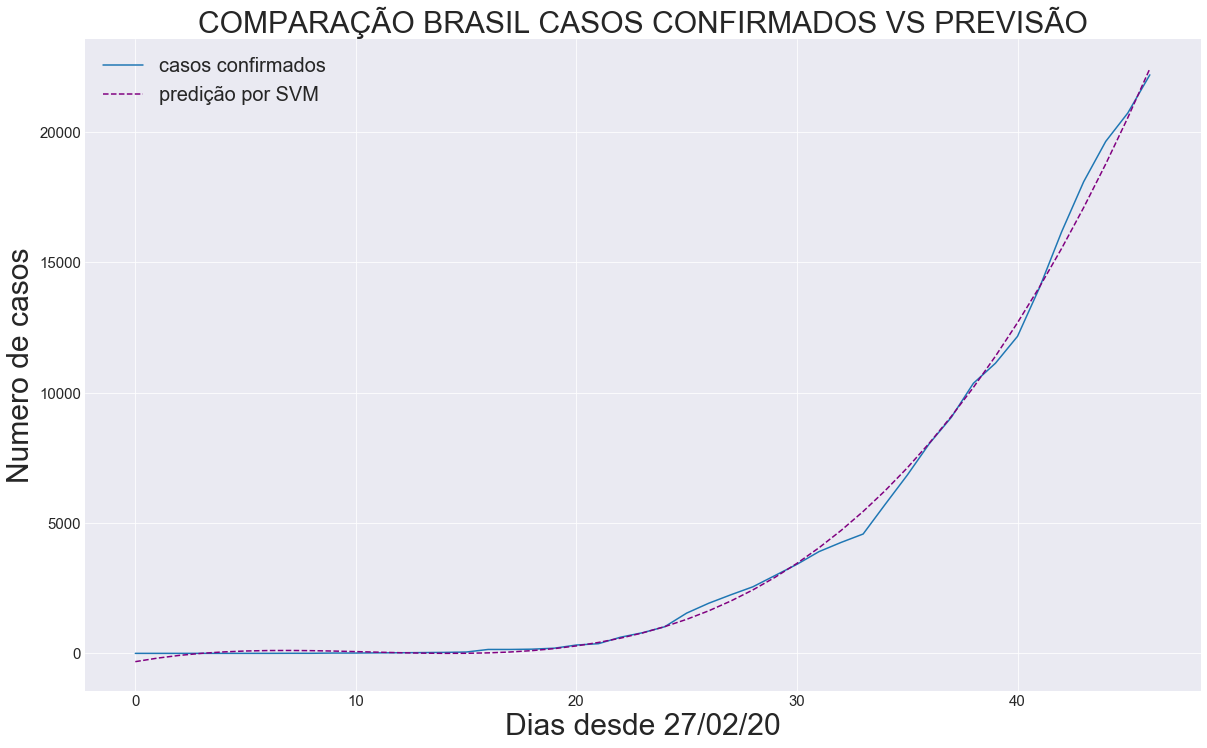

In [0]:
plt.figure(figsize=(20, 12))
plt.plot(dias_brasil, casos_brasil)
plt.plot(futuro_brasil[0:47],pred_caso_br[0:47], linestyle = 'dashed', color='purple')
plt.title('COMPARAÇÃO BRASIL CASOS CONFIRMADOS VS PREVISÃO', size=30)
plt.xlabel('Dias desde 27/02/20', size = 30)
plt.ylabel('Numero de casos', size = 30)
plt.legend(['casos confirmados', 'predição por SVM'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


In [0]:
# predicao mortes brasil
X_train, X_test, y_train, y_test = train_test_split(df_mortes_brasil, target_mortos_br, test_size=0.1, random_state=42)

params = {'C': [2],
 'coef0': [4.0],
 'epsilon': [0.01],
 'gamma': [0.1],
 'kernel': ['poly'],
 'max_iter': [-1],
 'shrinking': [True],
 'degree':[4]}
# o gridsearch esta implementando bruto em outro arquivo na maquina local, pois ele demorou mais de 24h para rodar
svr = SVR()
svm = GridSearchCV(svr, params,scoring='neg_mean_absolute_error', cv=10,return_train_score=False, n_jobs=-1, verbose=1 )
print('fitting...')
svm.fit(X_train,y_train)

fitting...
Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:  6.8min remaining:  4.5min
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed: 13.2min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [2], 'coef0': [4.0], 'degree': [4],
                         'epsilon': [0.01], 'gamma': [0.1], 'kernel': ['poly'],
                         'max_iter': [-1], 'shrinking': [True]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_absolute_error', verbose=1)

In [0]:
pred_mortes_br = svm.predict(futuro_brasil)

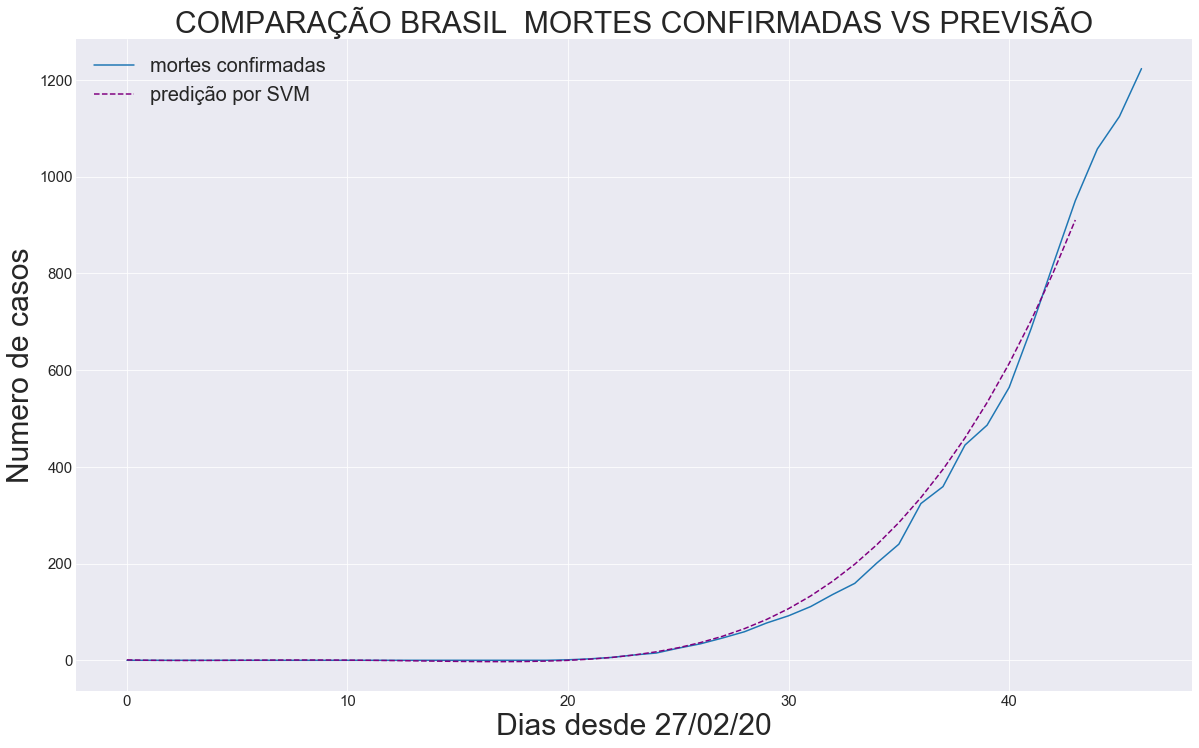

In [0]:
plt.figure(figsize=(20, 12))
plt.plot(dias_brasil, mortes_brasil)
plt.plot(futuro_brasil[0:44], pred_mortes_br[0:44], linestyle = 'dashed', color='purple')
plt.title('COMPARAÇÃO BRASIL  MORTES CONFIRMADAS VS PREVISÃO', size=30)
plt.xlabel('Dias desde 27/02/20', size = 30)
plt.ylabel('Numero de casos', size = 30)
plt.legend(['mortes confirmadas', 'predição por SVM'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


In [0]:
# predicao casos EUA
X_train, X_test, y_train, y_test = train_test_split(df_confirmados_eua, target_confirmado_eua, test_size=0.1, random_state=42)

params = {'C': [2], 'coef0': [0.0, 3.5], 'epsilon': [0.001], 'gamma': [0.5], 'kernel': ['poly'], 'max_iter': [-1], 'shrinking':[False]}
# o gridsearch esta implementando bruto em outro arquivo na maquina local, pois ele demorou mais de 24h para rodar
svr = SVR()
svm = GridSearchCV(svr, params,scoring='neg_mean_absolute_error', cv=10,return_train_score=False, n_jobs=-1, verbose=1 )
print('fitting...')
svm.fit(X_train,y_train)

fitting...
Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  1.9min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [2], 'coef0': [0.0, 3.5], 'epsilon': [0.001],
                         'gamma': [0.5], 'kernel': ['poly'], 'max_iter': [-1],
                         'shrinking': [False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_absolute_error', verbose=1)

In [0]:
pred_caso_eua = svm.predict(futuro_eua)

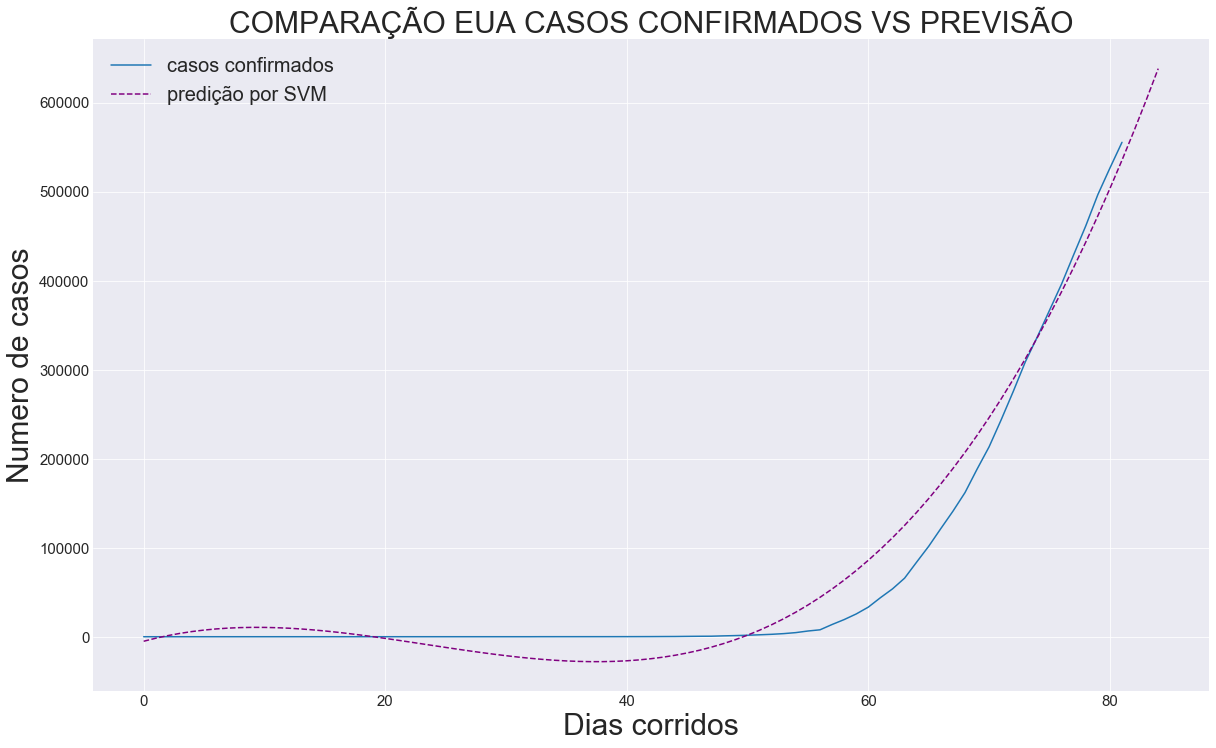

In [0]:
plt.figure(figsize=(20, 12))
plt.plot(dias_eua, casos_eua)
plt.plot(futuro_eua[0:85],pred_caso_eua[0:85], linestyle = 'dashed', color='purple')
plt.title('COMPARAÇÃO EUA CASOS CONFIRMADOS VS PREVISÃO', size=30)
plt.xlabel('Dias corridos', size = 30)
plt.ylabel('Numero de casos', size = 30)
plt.legend(['casos confirmados', 'predição por SVM'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


In [0]:
# predicao mortos EUA
X_train, X_test, y_train, y_test = train_test_split(df_mortes_eua, target_mortos_eua, test_size=0.1, random_state=42)

params = {'C': [2], 'coef0': [0.0, 3.5], 'epsilon': [0.001], 'gamma': [0.5], 'kernel': ['poly'], 'max_iter': [-1], 'shrinking':[False]}
# o gridsearch esta implementando bruto em outro arquivo na maquina local, pois ele demorou mais de 24h para rodar
svr = SVR()
svm = GridSearchCV(svr, params,scoring='neg_mean_absolute_error', cv=10,return_train_score=False, n_jobs=-1, verbose=1 )
print('fitting...')
svm.fit(X_train,y_train)

fitting...
Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed: 61.7min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [2], 'coef0': [0.0, 3.5], 'epsilon': [0.001],
                         'gamma': [0.5], 'kernel': ['poly'], 'max_iter': [-1],
                         'shrinking': [False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_absolute_error', verbose=1)

In [0]:
pred_mortes_eua = svm.predict(futuro_eua)

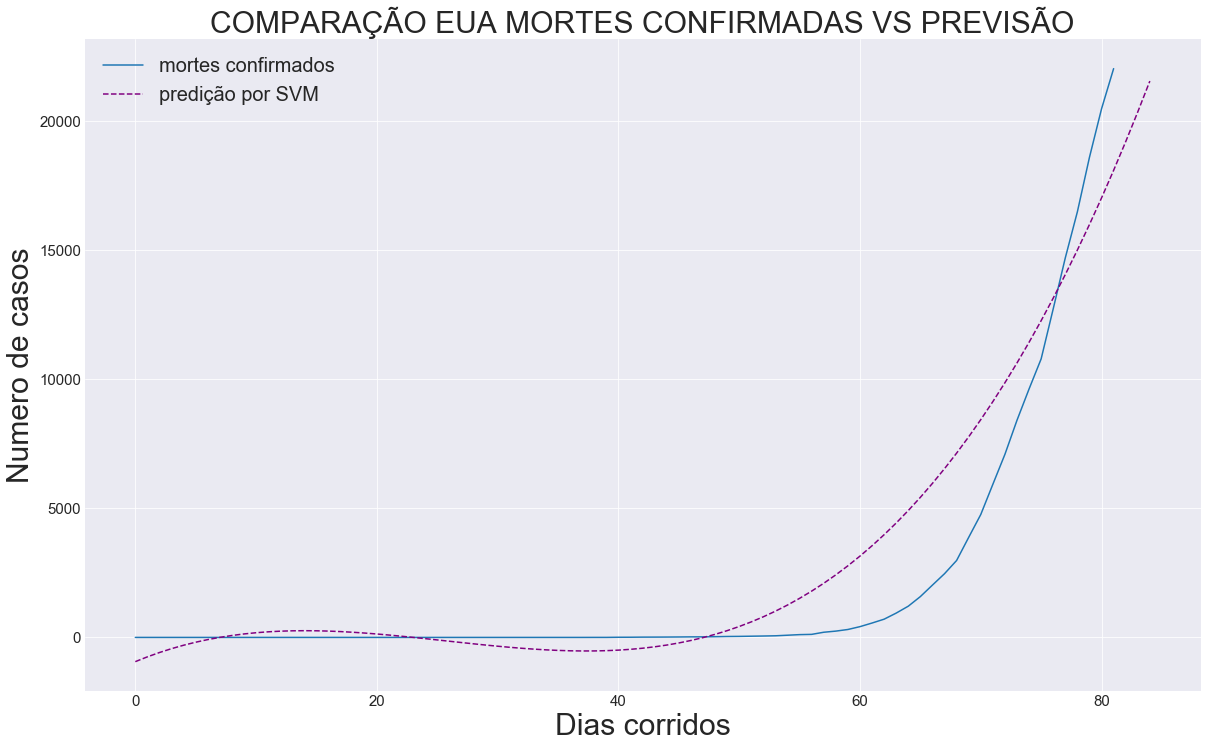

In [0]:
plt.figure(figsize=(20, 12))
plt.plot(dias_eua, mortes_eua)
plt.plot(futuro_eua[0:85],pred_mortes_eua[0:85], linestyle = 'dashed', color='purple')
plt.title('COMPARAÇÃO EUA MORTES CONFIRMADAS VS PREVISÃO', size=30)
plt.xlabel('Dias corridos', size = 30)
plt.ylabel('Numero de casos', size = 30)
plt.legend(['mortes confirmados', 'predição por SVM'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

In [0]:
# predicao casos ITALIA
X_train, X_test, y_train, y_test = train_test_split(df_confirmados_italia, target_confirmado_italia, test_size=0.1, random_state=42)

params = {'C': [2], 'coef0': [0.0, 3.5], 'epsilon': [0.001], 'gamma': [0.5], 'kernel': ['poly'], 'max_iter': [-1], 'shrinking':[False]}
# o gridsearch esta implementando bruto em outro arquivo na maquina local, pois ele demorou mais de 24h para rodar
svr = SVR()
svm = GridSearchCV(svr, params,scoring='neg_mean_absolute_error', cv=10,return_train_score=False, n_jobs=-1, verbose=1 )
print('fitting...')
svm.fit(X_train,y_train)

fitting...
Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed: 11.9min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [2], 'coef0': [0.0, 3.5], 'epsilon': [0.001],
                         'gamma': [0.5], 'kernel': ['poly'], 'max_iter': [-1],
                         'shrinking': [False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_absolute_error', verbose=1)

In [0]:
pred_caso_italia = svm.predict(futuro_italia)

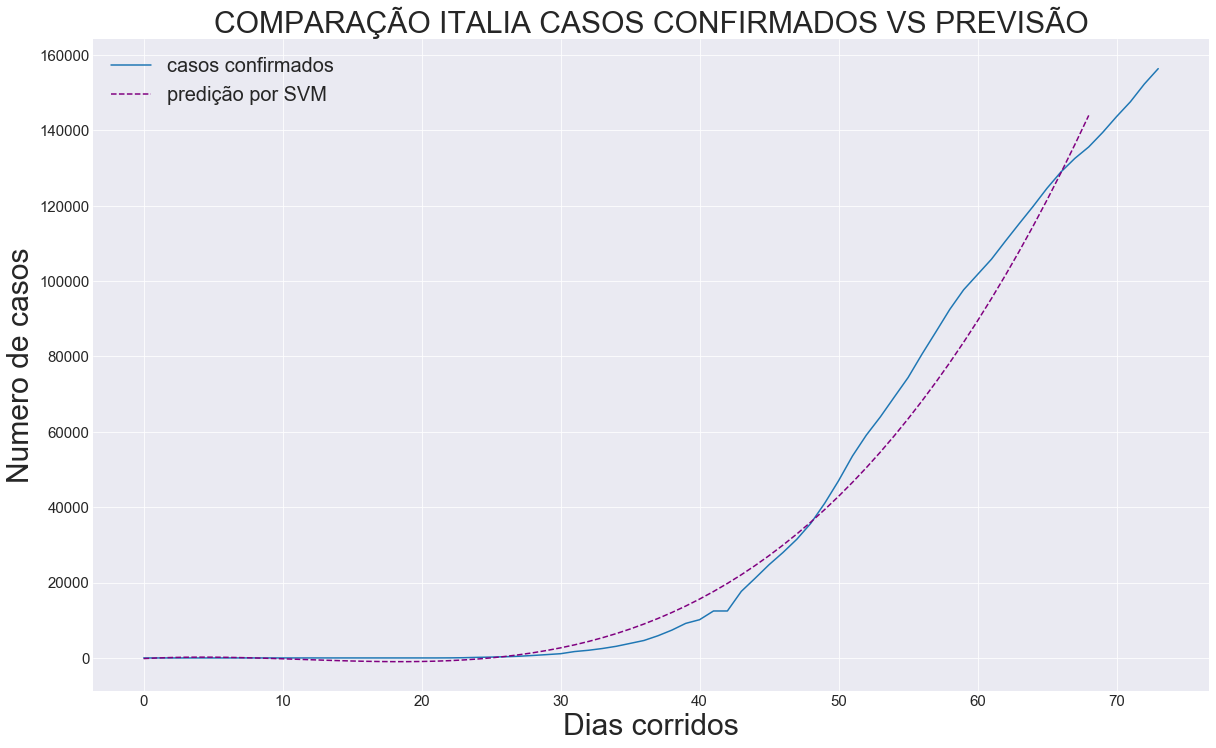

In [0]:
plt.figure(figsize=(20, 12))
plt.plot(dias_italia, casos_italia)
plt.plot(futuro_italia[0:69],pred_caso_italia[0:69], linestyle = 'dashed', color='purple')
plt.title('COMPARAÇÃO ITALIA CASOS CONFIRMADOS VS PREVISÃO', size=30)
plt.xlabel('Dias corridos', size = 30)
plt.ylabel('Numero de casos', size = 30)
plt.legend(['casos confirmados', 'predição por SVM'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


In [0]:
# predicao mortos ITALIA
X_train, X_test, y_train, y_test = train_test_split(df_mortes_italia, target_mortos_italia, test_size=0.1, random_state=42)

params = {'C': [2], 'coef0': [0.0, 3.5], 'epsilon': [0.001], 'gamma': [0.5], 'kernel': ['poly'], 'max_iter': [-1], 'shrinking':[False]}
# o gridsearch esta implementando bruto em outro arquivo na maquina local, pois ele demorou mais de 24h para rodar
svr = SVR()
svm = GridSearchCV(svr, params,scoring='neg_mean_absolute_error', cv=10,return_train_score=False, n_jobs=-1, verbose=1 )
print('fitting...')
svm.fit(X_train,y_train)

fitting...
Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed: 48.2min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [2], 'coef0': [0.0, 3.5], 'epsilon': [0.001],
                         'gamma': [0.5], 'kernel': ['poly'], 'max_iter': [-1],
                         'shrinking': [False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_absolute_error', verbose=1)

In [0]:
pred_mortes_italia = svm.predict(futuro_italia)

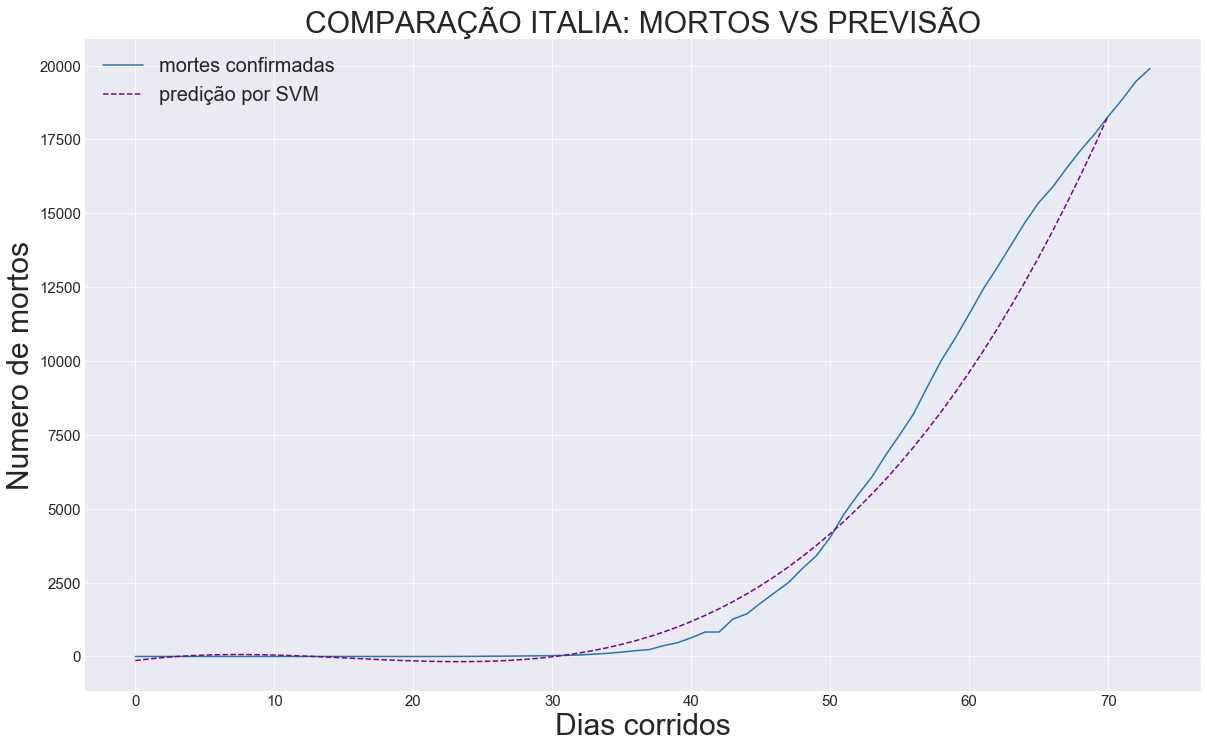

In [0]:
plt.figure(figsize=(20, 12))
plt.plot(dias_italia, mortes_italia)
plt.plot(futuro_italia[0:71],pred_mortes_italia[0:71], linestyle = 'dashed', color='purple')
plt.title('COMPARAÇÃO ITALIA: MORTOS VS PREVISÃO', size=30)
plt.xlabel('Dias corridos', size = 30)
plt.ylabel('Numero de mortos', size = 30)
plt.legend(['mortes confirmadas', 'predição por SVM'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


In [0]:
 # predicao casos SUECIA
X_train, X_test, y_train, y_test = train_test_split(df_confirmados_suecia, target_confirmado_suecia, test_size=0.1, random_state=42)

params = {'C': [2], 'coef0': [0.0, 3.5], 'epsilon': [0.001], 'gamma': [0.5], 'kernel': ['poly'], 'max_iter': [-1], 'shrinking':[False]}
# o gridsearch esta implementando bruto em outro arquivo na maquina local, pois ele demorou mais de 24h para rodar
svr = SVR()
svm = GridSearchCV(svr, params,scoring='neg_mean_absolute_error', cv=10,return_train_score=False, n_jobs=-1, verbose=1 )
print('fitting...')
svm.fit(X_train,y_train)

fitting...
Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed: 29.4min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [2], 'coef0': [0.0, 3.5], 'epsilon': [0.001],
                         'gamma': [0.5], 'kernel': ['poly'], 'max_iter': [-1],
                         'shrinking': [False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_absolute_error', verbose=1)

In [0]:
pred_caso_suecia = svm.predict(futuro_suecia)

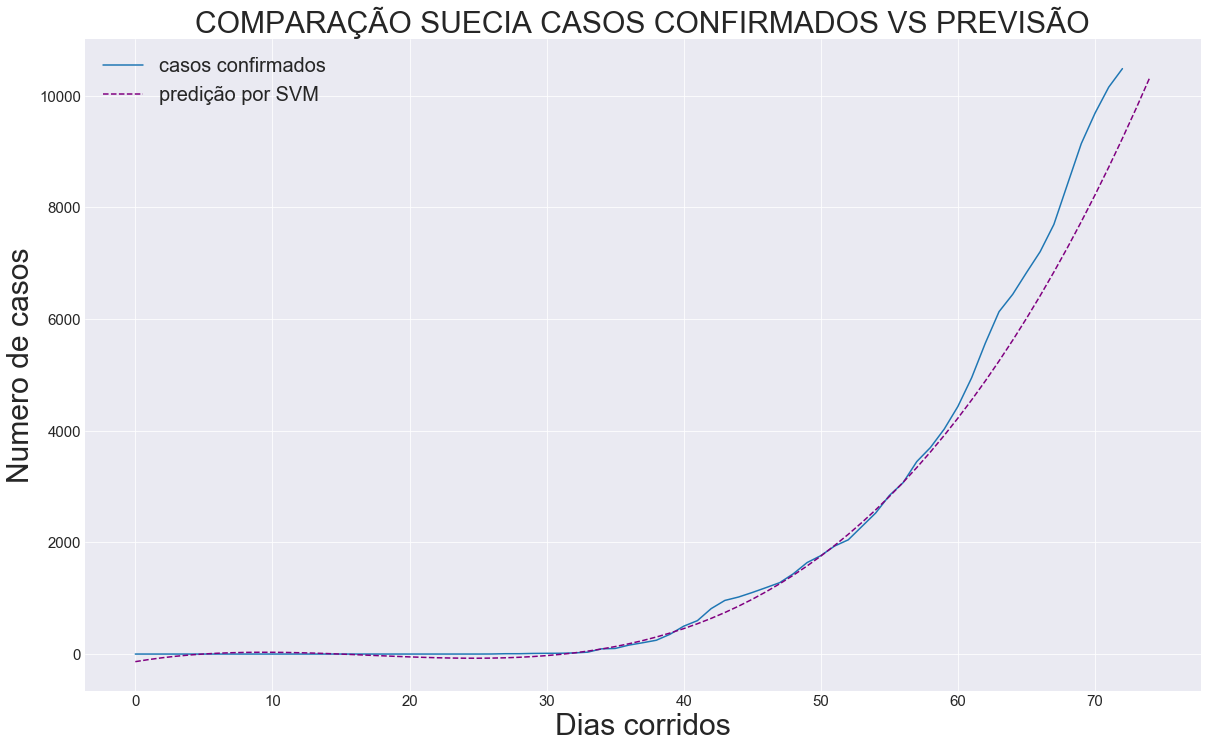

In [0]:
plt.figure(figsize=(20, 12))
plt.plot(dias_suecia, casos_suecia)
plt.plot(futuro_suecia[0:75],pred_caso_suecia[0:75], linestyle = 'dashed', color='purple')
plt.title('COMPARAÇÃO SUECIA CASOS CONFIRMADOS VS PREVISÃO', size=30)
plt.xlabel('Dias corridos', size = 30)
plt.ylabel('Numero de casos', size = 30)
plt.legend(['casos confirmados', 'predição por SVM'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


In [111]:
 # predicao MORTES SUECIA
X_train, X_test, y_train, y_test = train_test_split(df_mortes_suecia, target_mortos_suecia, test_size=0.1, random_state=42)

params = {'C': [2], 'coef0': [0.0, 3.5], 'epsilon': [0.001], 'gamma': [0.5], 'kernel': ['poly'], 'max_iter': [-1], 'shrinking':[False]}
# o gridsearch esta implementando bruto em outro arquivo na maquina local, pois ele demorou mais de 24h para rodar
svr = SVR()
svm = GridSearchCV(svr, params,scoring='neg_mean_absolute_error', cv=10,return_train_score=False, n_jobs=-1, verbose=1 )
print('fitting...')
svm.fit(X_train,y_train)

fitting...
Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed: 49.1min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [2], 'coef0': [0.0, 3.5], 'epsilon': [0.001],
                         'gamma': [0.5], 'kernel': ['poly'], 'max_iter': [-1],
                         'shrinking': [False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_absolute_error', verbose=1)

In [0]:
pred_mortes_suecia = svm.predict(futuro_suecia)

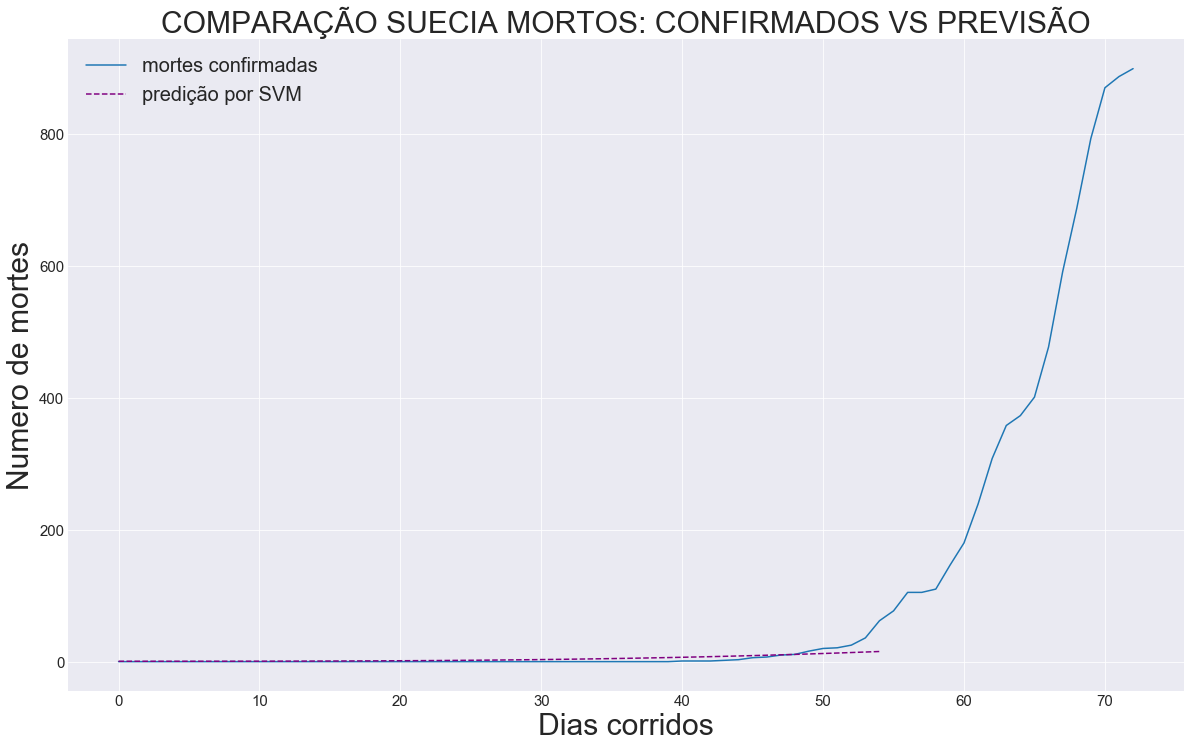

In [113]:
plt.figure(figsize=(20, 12))
plt.plot(dias_suecia, mortes_suecia)
plt.plot(futuro_suecia[0:55],pred_mortes_suecia[0:55], linestyle = 'dashed', color='purple')
plt.title('COMPARAÇÃO SUECIA MORTOS: CONFIRMADOS VS PREVISÃO', size=30)
plt.xlabel('Dias corridos', size = 30)
plt.ylabel('Numero de mortes', size = 30)
plt.legend(['mortes confirmadas', 'predição por SVM'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


# Apresentação de Resultados

Nesta secao construiremos 8 dataframes, um de casos confirmados e um de mortes para cada pais. Nesses dataframes nos teremos os casos oficiais e os que nosso programa previu, e ele sera atualizado diretamente.
Alem desses dataframes iremos refazer os graficos feitos na secao de graficos, porem agora com as previsoes, para ver se o cenario dos paises mudam em relaçao um ao outro 

In [0]:
colunas =[i for i in datas_futuras_br]
previsto = [i for i in pred_caso_br]
diferenca =[int(p) - int(r) for p,r in zip(pred_caso_br, casos_brasil)]
df_caso_br = pd.DataFrame([previsto[40:], casos_brasil[40:], diferenca[40:]], columns=colunas[40:], index = ['previsoes', 'real', 'diferenca'])


Abaixo a media de erro de nossa previsao para oS casos confirmados do  brasil e a tabela com as previsoes, casos reais e a diferenca entre os dois.
por se tratar de previsoes, ha tabelas que nao ha diferencas ainda, pois nosso programa preve 40 dias a frente. ARRASTE A BARRA DE ROLAGEM DAS TABELAS PARA VER OS DIAS FUTUROS.
ordem das tabelas:


1.  Confirmados Brasil
2.  Mortos Brasil
3.  Confirmados EUA
4.  Mortos EUA
5.  Confirmados Italia
6.  Mortos Italia
7.  Confirmados Suecia
8.  Mortos Suecia











In [106]:
diferenca = np.array(diferenca[40:])
print(f'A MEDIA DE ERRO PARA CASOS CONFIRMADOS  PARA O BRASIL FOI : {np.absolute(diferenca).mean()}')

A MEDIA DE ERRO PARA CASOS CONFIRMADOS  PARA O BRASIL FOI : 494.42857142857144


In [107]:
print('CASOS CONFIRMADOS PARA O BRASIL: ')
pd.set_option('display.max_columns', 250)
df_caso_br

CASOS CONFIRMADOS PARA O BRASIL: 


,04/06/20,04/07/20,04/08/20,04/09/20,04/10/20,04/11/20,04/12/20,04/13/20,04/14/20,04/15/20,04/16/20,04/17/20,04/18/20,04/19/20,04/20/20,04/21/20,04/22/20,04/23/20,04/24/20,04/25/20,04/26/20,04/27/20,04/28/20,04/29/20,04/30/20,05/01/20,05/02/20,05/03/20,05/04/20,05/05/20,05/06/20,05/07/20,05/08/20,05/09/20,05/10/20,05/11/20,05/12/20,05/13/20,05/14/20,05/15/20,05/16/20,05/17/20,05/18/20,05/19/20,05/20/20,05/21/20,05/22/20
previsoes,12684.034454,14060.598873,15532.080438,17101.595017,18772.258477,20547.186684,22429.495504,24422.300804,26528.718451,28751.864309,31094.854248,33560.804133,36152.829832,38874.047209,41727.572129,44716.520465,47844.008079,51113.150837,54527.064608,58088.865257,61801.66865,65668.590656,69692.747139,73877.253965,78225.227005,82739.782122,87424.035181,92281.102049,97314.098598,102526.14069,107920.344191,113499.82497,119267.698893,125227.081821,131381.089628,137732.838181,144285.443344,151042.020973,158005.686955,165179.557137,172566.747406,180170.373608,187993.55162,196039.397308,204311.026543,212811.55518,221544.099091
real,12161.000000,14034.000000,16170.000000,18092.000000,19638.000000,20727.000000,22192.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
diferenca,523.000000,26.000000,-638.000000,-991.000000,-866.000000,-180.000000,237.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
colunas =[i for i in datas_futuras_br]
previsto = [i for i in pred_mortes_br]
diferenca =[int(p) - int(r) for p,r in zip(pred_mortes_br, mortes_brasil)]
df_morto_br = pd.DataFrame([previsto[40:], mortes_brasil[40:], diferenca[40:]], columns=colunas[40:], index = ['previsoes', 'real', 'diferenca'])


In [109]:
diferenca = np.array(diferenca[40:])
print(f'A MEDIA DE ERRO DE MORTES  PARA O BRASIL FOI : {np.absolute(diferenca).mean()}')

A MEDIA DE ERRO DE MORTES  PARA O BRASIL FOI : 37.57142857142857


In [110]:
print('MORTES PARA O BRASIL: ')
pd.set_option('display.max_columns', 250)
df_morto_br

MORTES PARA O BRASIL: 


,04/06/20,04/07/20,04/08/20,04/09/20,04/10/20,04/11/20,04/12/20,04/13/20,04/14/20,04/15/20,04/16/20,04/17/20,04/18/20,04/19/20,04/20/20,04/21/20,04/22/20,04/23/20,04/24/20,04/25/20,04/26/20,04/27/20,04/28/20,04/29/20,04/30/20,05/01/20,05/02/20,05/03/20,05/04/20,05/05/20,05/06/20,05/07/20,05/08/20,05/09/20,05/10/20,05/11/20,05/12/20,05/13/20,05/14/20,05/15/20,05/16/20,05/17/20,05/18/20,05/19/20,05/20/20,05/21/20,05/22/20
previsoes,613.481267,702.945477,801.61431,910.086093,1028.977686,1158.924473,1300.580383,1454.617864,1621.727897,1802.620003,1998.022209,2208.681104,2435.361803,2678.847934,2939.941664,3219.46369,3518.253252,3837.168114,4177.084557,4538.897408,4923.520029,5331.884299,5764.940649,6223.658003,6709.023872,7222.044234,7763.743646,8335.165177,8937.370453,9571.439566,10238.471217,10939.582575,11675.90939,12448.605948,13258.844954,14107.817778,14996.734307,15926.822838,16899.330378,17915.522311,18976.682616,20084.11386,21239.136984,22443.091639,23697.335906,25003.246359,26362.21826
real,564.000000,686.000000,819.00000,950.000000,1057.000000,1124.000000,1223.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
diferenca,49.000000,16.000000,-18.00000,-40.000000,-29.000000,34.000000,77.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
colunas =[i for i in datas_futuras_us]
previsto = [i for i in pred_caso_eua]
diferenca =[int(p) - int(r) for p,r in zip(pred_caso_eua, casos_eua)]
df_caso_eua = pd.DataFrame([previsto[75:], casos_eua[75:], diferenca[75:]], columns=colunas[75:], index = ['previsoes', 'real', 'diferenca'])


In [115]:
diferenca = np.array(diferenca[75:])
print(f'A MEDIA DE ERRO PARA CASOS CONFIRMADOS  PARA O ESTADOS UNIDOS  FOI : {np.absolute(diferenca).mean()}')

A MEDIA DE ERRO PARA CASOS CONFIRMADOS  PARA O ESTADOS UNIDOS  FOI : 16190.57142857143


In [116]:
print('CASOS CONFIRMADOS PARA OS ESTADOS UNIDOS: ')
df_caso_eua

CASOS CONFIRMADOS PARA OS ESTADOS UNIDOS: 


,04/06/20,04/07/20,04/08/20,04/09/20,04/10/20,04/11/20,04/12/20,04/13/20,04/14/20,04/15/20,04/16/20,04/17/20,04/18/20,04/19/20,04/20/20,04/21/20,04/22/20,04/23/20,04/24/20,04/25/20,04/26/20,04/27/20,04/28/20,04/29/20,04/30/20,05/01/20,05/02/20,05/03/20,05/04/20,05/05/20,05/06/20,05/07/20,05/08/20,05/09/20,05/10/20,05/11/20,05/12/20,05/13/20,05/14/20,05/15/20,05/16/20,05/17/20,05/18/20,05/19/20,05/20/20,05/21/20,05/22/20
previsoes,361370.707735,387545.452944,414814.451265,443198.508821,472718.431719,503395.026079,535249.09804,568301.453722,602572.899233,638084.240709,674856.284273,712909.836046,752265.70215,792944.688692,834967.601839,878355.247652,923128.432314,969307.961916,1.016915e+06,1.065969e+06,1.116493e+06,1.168506e+06,1.222029e+06,1.277084e+06,1.333690e+06,1.391869e+06,1.451642e+06,1.513030e+06,1.576052e+06,1.640731e+06,1.707086e+06,1.775139e+06,1.844910e+06,1.916421e+06,1.989692e+06,2.064743e+06,2.141597e+06,2.220272e+06,2.300791e+06,2.383174e+06,2.467442e+06,2.553616e+06,2.641716e+06,2.731764e+06,2.823779e+06,2.917784e+06,3.013798e+06
real,366667.000000,396223.000000,429052.000000,461437.000000,496535.000000,526396.000000,555313.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
diferenca,-5297.000000,-8678.000000,-14238.000000,-18239.000000,-23817.000000,-23001.000000,-20064.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
colunas =[i for i in datas_futuras_us]
previsto = [i for i in pred_mortes_eua]
diferenca =[int(p) - int(r) for p,r in zip(pred_mortes_eua, mortes_eua)]
df_morto_eua = pd.DataFrame([previsto[75:], mortes_eua[75:], diferenca[75:]], columns=colunas[75:], index = ['previsoes', 'real', 'diferenca'])


In [118]:
diferenca = np.array(diferenca[75:])
print(f'A MEDIA DE ERRO PARA MORTES DO ESTADOS UNIDOS  FOI : {np.absolute(diferenca).mean()}')

A MEDIA DE ERRO PARA MORTES DO ESTADOS UNIDOS  FOI : 2001.5714285714287


In [119]:
print('MORTES PARA OS ESTADOS UNIDOS: ')
df_morto_eua

MORTES PARA OS ESTADOS UNIDOS: 


,04/06/20,04/07/20,04/08/20,04/09/20,04/10/20,04/11/20,04/12/20,04/13/20,04/14/20,04/15/20,04/16/20,04/17/20,04/18/20,04/19/20,04/20/20,04/21/20,04/22/20,04/23/20,04/24/20,04/25/20,04/26/20,04/27/20,04/28/20,04/29/20,04/30/20,05/01/20,05/02/20,05/03/20,05/04/20,05/05/20,05/06/20,05/07/20,05/08/20,05/09/20,05/10/20,05/11/20,05/12/20,05/13/20,05/14/20,05/15/20,05/16/20,05/17/20,05/18/20,05/19/20,05/20/20,05/21/20,05/22/20
previsoes,12262.997235,13136.729461,14047.944526,14997.387503,15985.803401,17013.9372,18082.533912,19192.338546,20344.096114,21538.551626,22776.450093,24058.536586,25385.555993,26758.253449,28177.373841,29643.66227,31157.863718,32720.723226,34332.985743,35995.396309,37708.699968,39473.641637,41290.966419,43161.419231,45085.745239,47064.689361,49098.996576,51189.411866,53336.680393,55541.547015,57804.756715,60127.054773,62509.18593,64951.895345,67455.927818,70022.02851,72650.942586,75343.414659,78100.190137,80922.013816,83809.630861,86763.786065,89785.224597,92874.691432,96032.931432,99260.689882,102558.711755
real,10783.000000,12722.000000,14695.000000,16478.000000,18586.000000,20463.0000,22020.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
diferenca,1479.000000,414.000000,-648.000000,-1481.000000,-2601.000000,-3450.0000,-3938.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
colunas =[i for i in datas_futuras_it]
previsto = [i for i in pred_caso_italia]
diferenca =[int(p) - int(r) for p,r in zip(pred_caso_italia, casos_italia)]
df_caso_italia = pd.DataFrame([previsto[67:], casos_italia[67:], diferenca[67:]], columns=colunas[67:], index = ['previsoes', 'real', 'diferenca'])

In [121]:
diferenca = np.array(diferenca[67:])
print(f'A MEDIA DE ERRO PARA CASOS CONFIRMADOS DA ITALIA  FOI : {np.absolute(diferenca).mean()}')

A MEDIA DE ERRO PARA CASOS CONFIRMADOS DA ITALIA  FOI : 16979.571428571428


In [122]:
print('CASOS CONFIRMADOS PARA A ITALIA: ')
df_caso_italia

CASOS CONFIRMADOS PARA A ITALIA: 


,04/06/20,04/07/20,04/08/20,04/09/20,04/10/20,04/11/20,04/12/20,04/13/20,04/14/20,04/15/20,04/16/20,04/17/20,04/18/20,04/19/20,04/20/20,04/21/20,04/22/20,04/23/20,04/24/20,04/25/20,04/26/20,04/27/20,04/28/20,04/29/20,04/30/20,05/01/20,05/02/20,05/03/20,05/04/20,05/05/20,05/06/20,05/07/20,05/08/20,05/09/20,05/10/20,05/11/20,05/12/20,05/13/20,05/14/20,05/15/20,05/16/20,05/17/20,05/18/20,05/19/20,05/20/20,05/21/20,05/22/20
previsoes,136201.463298,143952.273084,151985.967649,160307.537488,168921.973142,177834.265065,187049.403791,196572.379819,206408.183679,216561.805864,227038.236871,237842.467214,248979.487397,260454.287954,272271.859361,284437.192113,296955.276754,309831.103788,323069.663686,336675.946988,350654.944173,365011.645787,379751.042318,394878.124257,410397.882146,426315.306462,442635.3877,459363.116422,476503.483091,494061.478193,512042.092305,530450.315885,549291.139478,568569.553525,588290.548581,608459.115133,629080.243711,650158.92481,671700.148954,693708.906614,716190.188306,739148.984548,762590.285817,786519.082723,810940.365712,835859.125234,861280.351827
real,132547.000000,135586.000000,139422.000000,143626.000000,147577.000000,152271.000000,156363.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
diferenca,3654.000000,8366.000000,12563.000000,16681.000000,21344.000000,25563.000000,30686.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
colunas =[i for i in datas_futuras_it]
previsto = [i for i in pred_mortes_italia]
diferenca =[int(p) - int(r) for p,r in zip(pred_mortes_italia, mortes_italia)]
df_morto_italia = pd.DataFrame([previsto[67:], mortes_italia[67:], diferenca[67:]], columns=colunas[67:], index = ['previsoes', 'real', 'diferenca'])

In [124]:
diferenca = np.array(diferenca[67:])
print(f'A MEDIA DE ERRO PARA MORTES DA ITALIA FOI : {np.absolute(diferenca).mean()}')

A MEDIA DE ERRO PARA MORTES DA ITALIA FOI : 825.0


In [125]:
print('MORTES CONFIRMADOS DA ITALIA: ')
df_morto_italia

MORTES CONFIRMADOS DA ITALIA: 


,04/06/20,04/07/20,04/08/20,04/09/20,04/10/20,04/11/20,04/12/20,04/13/20,04/14/20,04/15/20,04/16/20,04/17/20,04/18/20,04/19/20,04/20/20,04/21/20,04/22/20,04/23/20,04/24/20,04/25/20,04/26/20,04/27/20,04/28/20,04/29/20,04/30/20,05/01/20,05/02/20,05/03/20,05/04/20,05/05/20,05/06/20,05/07/20,05/08/20,05/09/20,05/10/20,05/11/20,05/12/20,05/13/20,05/14/20,05/15/20,05/16/20,05/17/20,05/18/20,05/19/20,05/20/20,05/21/20,05/22/20
previsoes,15317.931531,16274.922653,17269.839958,18303.403663,19376.333976,20489.35112,21643.175292,22838.526733,24076.125633,25356.692214,26680.946678,28049.609275,29463.40018,30923.039615,32429.247791,33982.744941,35584.251262,37234.486953,38934.172287,40684.027404,42484.772552,44337.127944,46241.813789,48199.550292,50211.057724,52277.056198,54398.265991,56575.40731,58809.200386,61100.365364,63449.62255,65857.6921,68325.294212,70853.149169,73441.977111,76092.498298,78805.432922,81581.501213,84421.423347,87325.919578,90295.710083,93331.515136,96434.054901,99604.049591,102842.219467,106149.284683,109525.965423
real,16523.000000,17127.000000,17669.000000,18279.000000,18849.000000,19468.00000,19899.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
diferenca,-1206.000000,-853.000000,-400.000000,24.000000,527.000000,1021.00000,1744.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
colunas =[i for i in datas_futuras_su]
previsto = [i for i in pred_caso_suecia]
diferenca =[int(p) - int(r) for p,r in zip(pred_caso_suecia, casos_suecia)]
df_caso_suecia = pd.DataFrame([previsto[66:], casos_suecia[66:], diferenca[66:]], columns=colunas[66:], index = ['previsoes', 'real', 'diferenca'])

In [127]:
diferenca = np.array(diferenca[66:])
print(f'A MEDIA DE ERRO PARA CASOS CONFIRMADOS DA SUECIA  FOI : {np.absolute(diferenca).mean()}')

A MEDIA DE ERRO PARA CASOS CONFIRMADOS DA SUECIA  FOI : 1189.0


In [128]:
print('CASOS CONFIRMADOS PARA A SUECIA: ')
df_caso_suecia

CASOS CONFIRMADOS PARA A SUECIA: 


,04/06/20,04/07/20,04/08/20,04/09/20,04/10/20,04/11/20,04/12/20,04/13/20,04/14/20,04/15/20,04/16/20,04/17/20,04/18/20,04/19/20,04/20/20,04/21/20,04/22/20,04/23/20,04/24/20,04/25/20,04/26/20,04/27/20,04/28/20,04/29/20,04/30/20,05/01/20,05/02/20,05/03/20,05/04/20,05/05/20,05/06/20,05/07/20,05/08/20,05/09/20,05/10/20,05/11/20,05/12/20,05/13/20,05/14/20,05/15/20,05/16/20,05/17/20,05/18/20,05/19/20,05/20/20,05/21/20,05/22/20
previsoes,6417.037739,6841.135613,7282.981743,7742.931363,8221.339699,8718.561997,9234.953496,9770.869423,10326.665017,10902.695519,11499.316155,12116.882165,12755.74878,13416.271248,14098.80478,14803.704644,15531.326073,16282.02427,17056.154496,17854.071969,18676.131959,19522.68966,20394.100342,21290.719224,22212.901558,23161.002534,24135.37745,25136.381478,26164.369912,27219.69793,28302.720849,29413.793816,30553.272133,31721.510964,32918.865655,34145.691338,35402.34327,36689.176735,38006.546944,39354.809121,40734.318505,42145.430306,43588.49984,45063.882241,46571.932763,48113.006753,49687.459328
real,7206.000000,7693.000000,8419.000000,9141.000000,9685.000000,10151.000000,10483.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
diferenca,-789.000000,-852.000000,-1137.000000,-1399.000000,-1464.000000,-1433.000000,-1249.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
colunas =[i for i in datas_futuras_su]
previsto = [i for i in pred_mortes_suecia]
diferenca =[int(p) - int(r) for p,r in zip(pred_mortes_suecia, mortes_suecia)]
df_morto_suecia = pd.DataFrame([previsto[66:], mortes_suecia[66:], diferenca[66:]], columns=colunas[66:], index = ['previsoes', 'real', 'diferenca'])

In [130]:
diferenca = np.array(diferenca[66:])
print(f'A MEDIA DE ERRO PARA MORTES DA SUECIA FOI : {np.absolute(diferenca).mean()}')

A MEDIA DE ERRO PARA MORTES DA SUECIA FOI : 712.4285714285714


In [131]:
print('MORTES SUECIA: ')
df_morto_suecia

MORTES SUECIA: 


,04/06/20,04/07/20,04/08/20,04/09/20,04/10/20,04/11/20,04/12/20,04/13/20,04/14/20,04/15/20,04/16/20,04/17/20,04/18/20,04/19/20,04/20/20,04/21/20,04/22/20,04/23/20,04/24/20,04/25/20,04/26/20,04/27/20,04/28/20,04/29/20,04/30/20,05/01/20,05/02/20,05/03/20,05/04/20,05/05/20,05/06/20,05/07/20,05/08/20,05/09/20,05/10/20,05/11/20,05/12/20,05/13/20,05/14/20,05/15/20,05/16/20,05/17/20,05/18/20,05/19/20,05/20/20,05/21/20,05/22/20
previsoes,27.594732,28.839346,30.121649,31.442251,32.801672,34.200506,35.639303,37.118628,38.639044,40.201101,41.80538,43.452429,45.142813,46.877157,48.655905,50.479696,52.349112,54.26467,56.226919,58.236471,60.293844,62.399649,64.554434,66.758749,69.013144,71.318197,73.67449,76.08251,78.542929,81.056265,83.623037,86.243857,88.919302,91.649954,94.436209,97.278799,100.178274,103.135122,106.149954,109.223318,112.355765,115.547964,118.800284,122.113455,125.488028,128.924429,132.42333
real,477.000000,591.000000,687.000000,793.000000,870.000000,887.000000,899.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
diferenca,-450.000000,-563.000000,-657.000000,-762.000000,-838.000000,-853.000000,-864.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


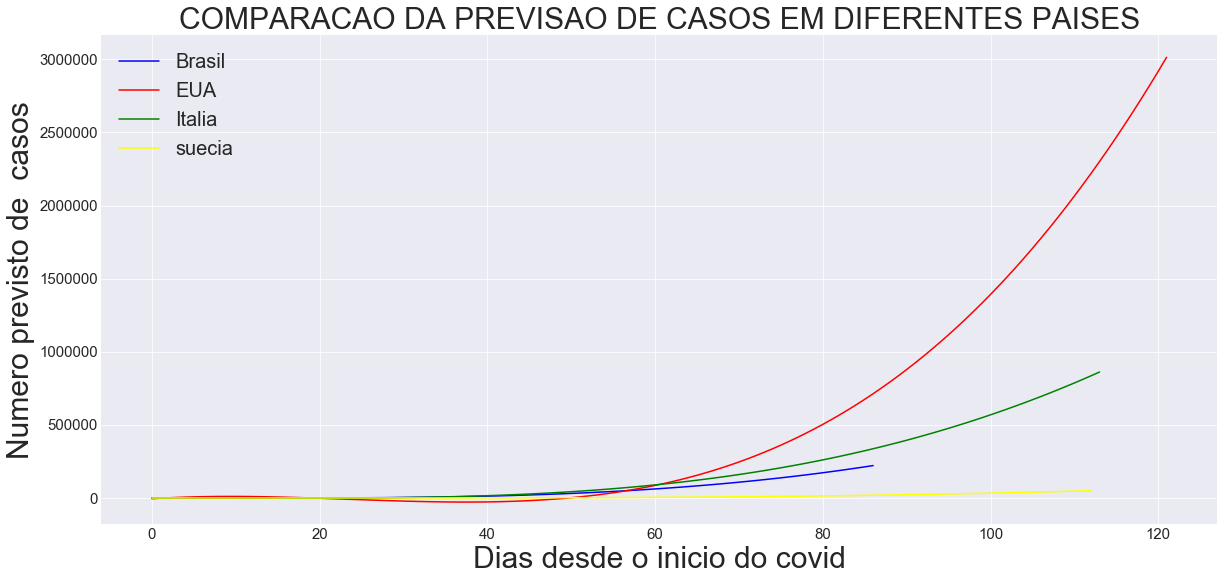

In [132]:
plt.figure(figsize=(20, 9))
plt.plot(futuro_brasil, pred_caso_br, color='blue')
plt.plot(futuro_eua, pred_caso_eua, color='red')
plt.plot(futuro_italia, pred_caso_italia, color='green')
plt.plot(futuro_suecia, pred_caso_suecia, color='yellow')

plt.title('COMPARACAO DA PREVISAO DE CASOS EM DIFERENTES PAISES', size=30)
plt.xlabel('Dias desde o inicio do covid', size = 30)
plt.ylabel('Numero previsto de  casos', size = 30)
plt.legend(['Brasil', 'EUA','Italia', 'suecia'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


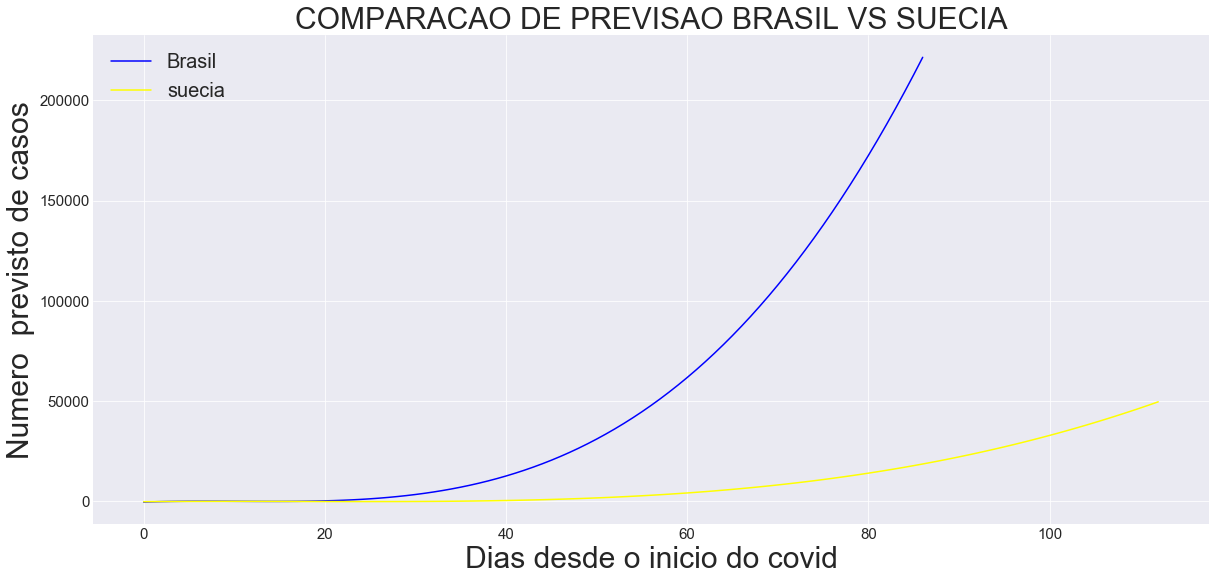

In [133]:
plt.figure(figsize=(20, 9))
plt.plot(futuro_brasil, pred_caso_br, color='blue')
plt.plot(futuro_suecia, pred_caso_suecia, color='yellow')


plt.title('COMPARACAO DE PREVISAO BRASIL VS SUECIA', size=30)
plt.xlabel('Dias desde o inicio do covid', size = 30)
plt.ylabel('Numero  previsto de casos', size = 30)
plt.legend(['Brasil', 'suecia'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


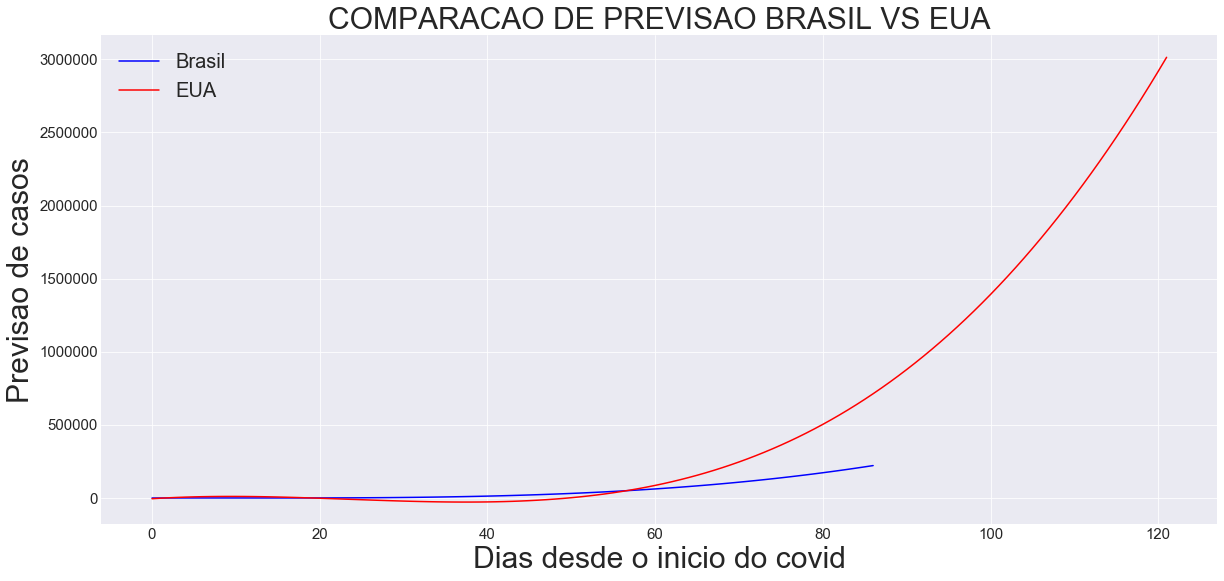

In [134]:
plt.figure(figsize=(20, 9))
plt.plot(futuro_brasil, pred_caso_br, color='blue')
plt.plot(futuro_eua, pred_caso_eua, color='red')

plt.title('COMPARACAO DE PREVISAO BRASIL VS EUA', size=30)
plt.xlabel('Dias desde o inicio do covid', size = 30)
plt.ylabel('Previsao de casos', size = 30)
plt.legend(['Brasil', 'EUA'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


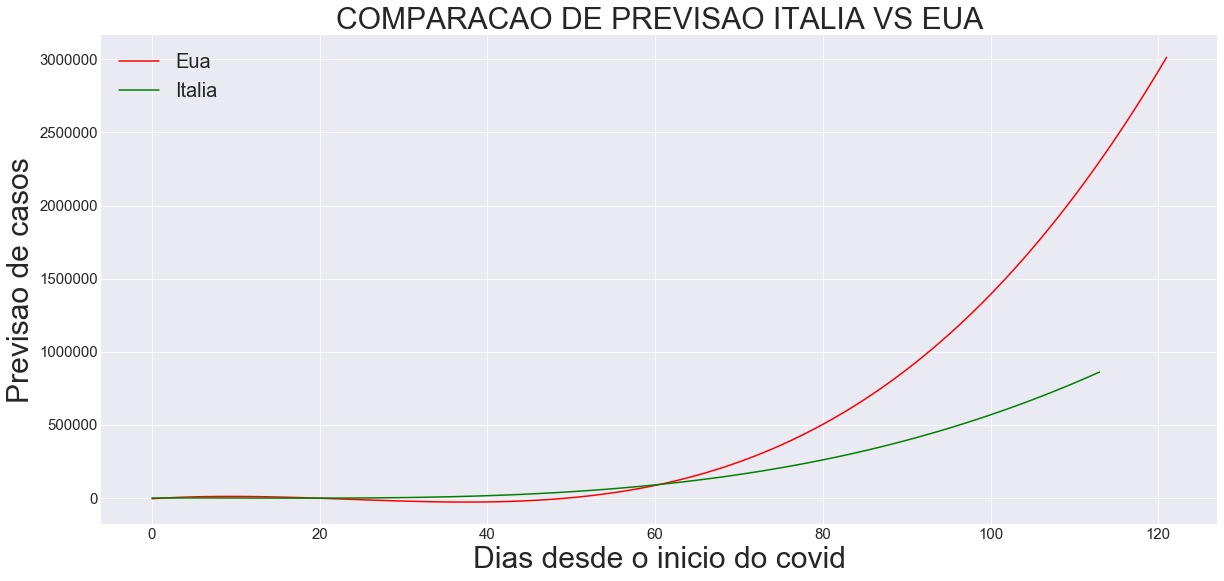

In [135]:
plt.figure(figsize=(20, 9))
plt.plot(futuro_eua, pred_caso_eua, color='red')
plt.plot(futuro_italia, pred_caso_italia, color='green')


plt.title('COMPARACAO DE PREVISAO ITALIA VS EUA', size=30)
plt.xlabel('Dias desde o inicio do covid', size = 30)
plt.ylabel('Previsao de casos', size = 30)
plt.legend(['Eua', 'Italia'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


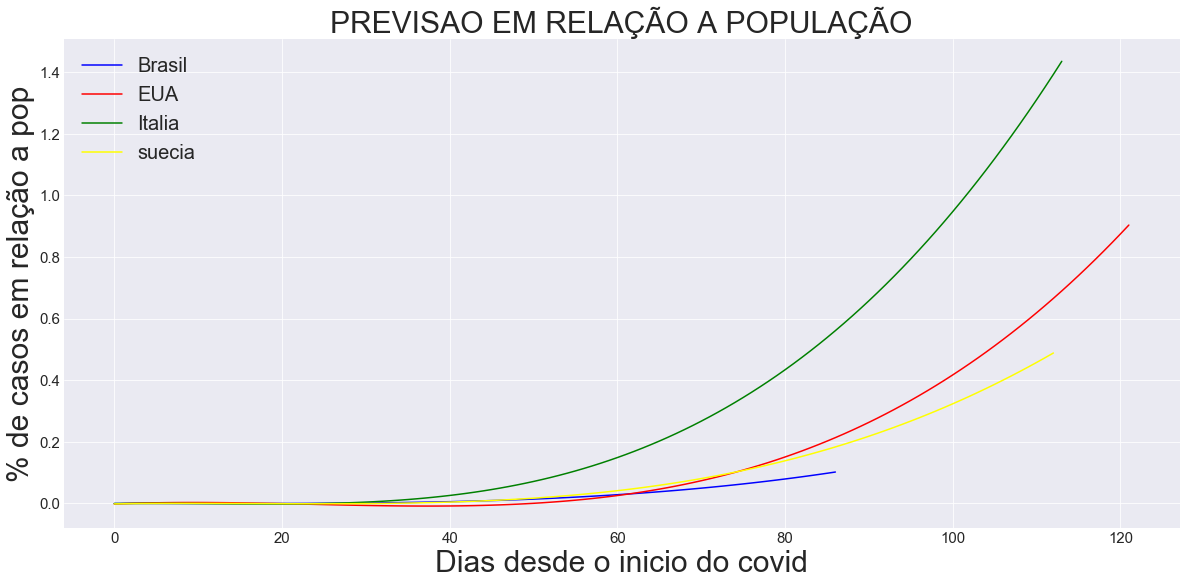

In [136]:
eua_porc = []
br_porc = []
it_porc = []
su_porc = []

for i in pred_caso_eua:
  porc = (i / 333545145)*100
  eua_porc.append(porc)
for i in pred_caso_br:
  porc = (i / 217089238)*100
  br_porc.append(porc)
for i in pred_caso_italia:
  porc = (i / 60017348)*100
  it_porc.append(porc)
for i in pred_caso_suecia:
  porc = (i / 10174790)*100
  su_porc.append(porc)

plt.figure(figsize=(20, 9))
plt.plot(futuro_brasil, br_porc, color='blue')
plt.plot(futuro_eua, eua_porc, color='red')
plt.plot(futuro_italia, it_porc, color='green')
plt.plot(futuro_suecia, su_porc, color='yellow')

plt.title('PREVISAO EM RELAÇÃO A POPULAÇÃO', size=30)
plt.xlabel('Dias desde o inicio do covid', size = 30)
plt.ylabel('% de casos em relação a pop', size = 30)
plt.legend(['Brasil', 'EUA','Italia', 'suecia'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


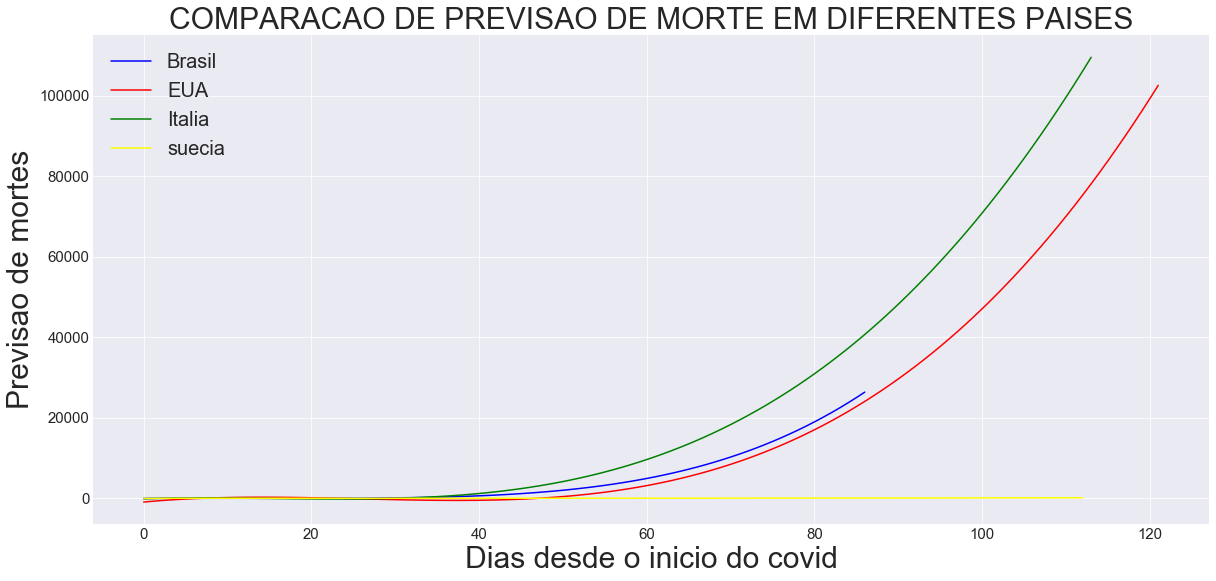

In [137]:
plt.figure(figsize=(20, 9))
plt.plot(futuro_brasil, pred_mortes_br, color='blue')
plt.plot(futuro_eua, pred_mortes_eua, color='red')
plt.plot(futuro_italia, pred_mortes_italia, color='green')
plt.plot(futuro_suecia, pred_mortes_suecia , color='yellow')

plt.title('COMPARACAO DE PREVISAO DE MORTE EM DIFERENTES PAISES', size=30)
plt.xlabel('Dias desde o inicio do covid', size = 30)
plt.ylabel('Previsao de mortes', size = 30)
plt.legend(['Brasil', 'EUA','Italia', 'suecia'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


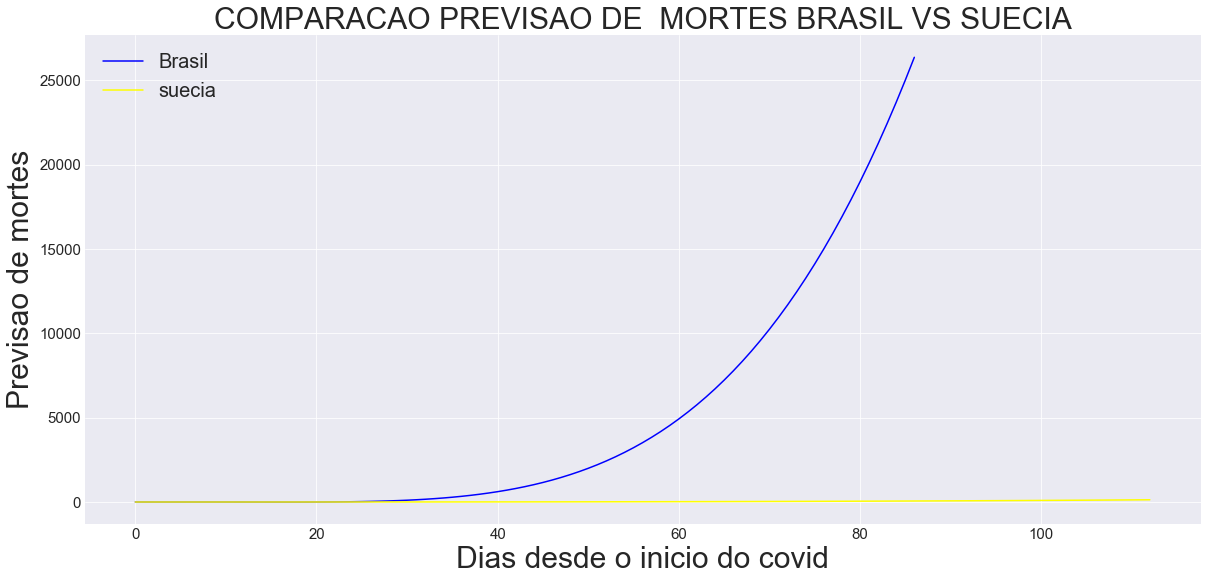

In [138]:
plt.figure(figsize=(20, 9))
plt.plot(futuro_brasil, pred_mortes_br, color='blue')
plt.plot(futuro_suecia, pred_mortes_suecia , color='yellow')

plt.title('COMPARACAO PREVISAO DE  MORTES BRASIL VS SUECIA', size=30)
plt.xlabel('Dias desde o inicio do covid', size = 30)
plt.ylabel('Previsao de mortes', size = 30)
plt.legend(['Brasil', 'suecia'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


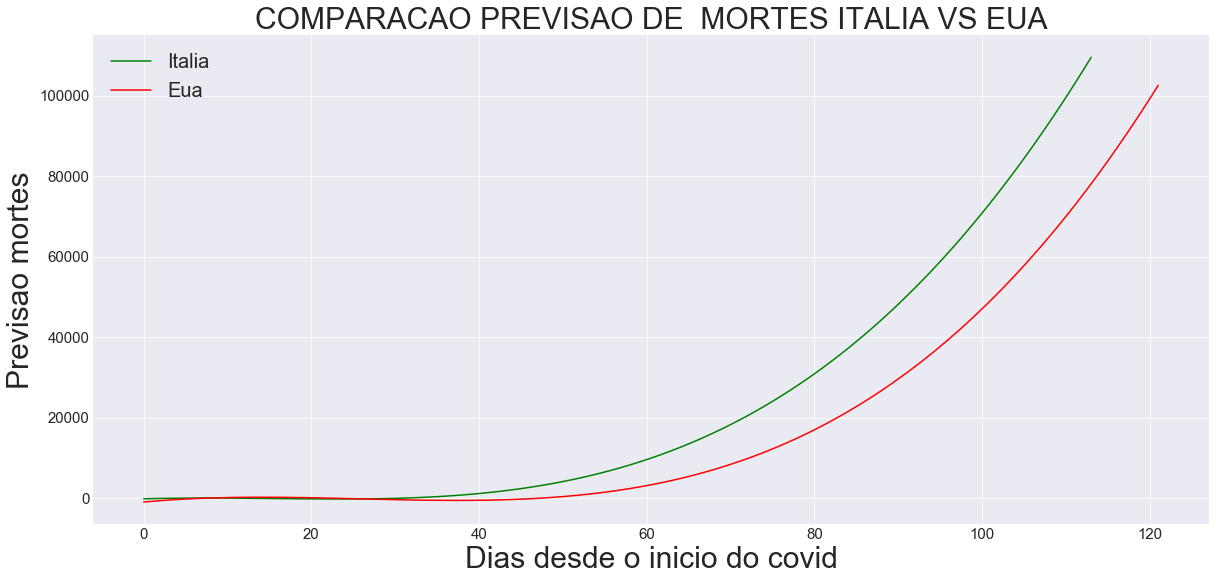

In [139]:
plt.figure(figsize=(20, 9))
plt.plot(futuro_italia, pred_mortes_italia, color='green')
plt.plot(futuro_eua, pred_mortes_eua, color='red')

plt.title('COMPARACAO PREVISAO DE  MORTES ITALIA VS EUA', size=30)
plt.xlabel('Dias desde o inicio do covid', size = 30)
plt.ylabel('Previsao mortes', size = 30)
plt.legend(['Italia', 'Eua'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


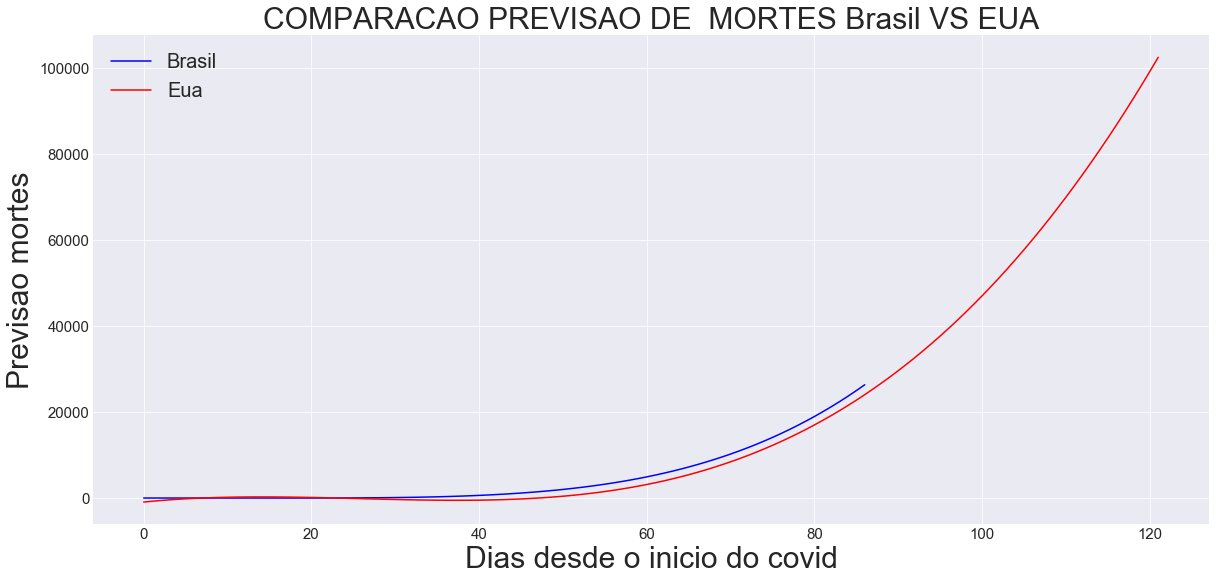

In [140]:
plt.figure(figsize=(20, 9))
plt.plot(futuro_brasil, pred_mortes_br, color='blue')
plt.plot(futuro_eua, pred_mortes_eua, color='red')

plt.title('COMPARACAO PREVISAO DE  MORTES Brasil VS EUA', size=30)
plt.xlabel('Dias desde o inicio do covid', size = 30)
plt.ylabel('Previsao mortes', size = 30)
plt.legend(['Brasil', 'Eua'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


In [141]:
eua_porc = []
br_porc = []
it_porc = []
su_porc = []

for i in pred_mortes_eua:
  porc = (i / 333545145)*100
  eua_porc.append(porc)
for i in pred_mortes_brasil:
  porc = (i / 217089238)*100
  br_porc.append(porc)
for i in pred_mortes_italia:
  porc = (i / 60017348)*100
  it_porc.append(porc)
for i in pred_mortes_suecia:
  porc = (i / 10174790)*100
  su_porc.append(porc)

plt.figure(figsize=(20, 9))
plt.plot(futuro_brasil, br_porc, color='blue')
plt.plot(futuro_eua, eua_porc, color='red')
plt.plot(futuro_italia, it_porc, color='green')
plt.plot(futuro_suecia, su_porc, color='yellow')

plt.title('PROGRESSÃO DE MORTES EM RELAÇÃO A POPULAÇÃO', size=30)
plt.xlabel('Dias desde o inicio do covid', size = 30)
plt.ylabel('% de mortes em relação a pop', size = 30)
plt.legend(['Brasil', 'EUA','Italia', 'suecia'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


NameError: ignored